# Loss Functions
- Regression 문제: $y$가 연속적인 값을 가지는 Approximation 문제<br>
$ \ \ $ $\checkmark \ $ Label data $y$와 deep neural network을 이용한 예측치 $\hat y$의 차이를 최소화하는 문제<br>
$ \ \ $ $\checkmark \ $ Loss function으로 **MSE(Mean Squared Error)**를 이용 <br><br>

- Classification 문제: $y$가 이산값을 가지는 Approximation 문제<br>
$ \ \ $ $\checkmark \ $ $y$의  class를 분류하는 문제<br>
$ \ \ $ $\checkmark \ $ Loss function으로  **CrossEntropy**를 이용<br>
$ \ \ $ $\checkmark \ $ Accuracy, Precision, Recall 등을 이용하여 model의 적정성을 평가<br>

[참고자료] Yann N. Dauphin and et. al., Identifying and attacking the saddle point problem in high-dimensional <br> $\qquad \quad \ \ $ non-convex optimization, arXiv:1406.2572v1 [cs.LG] 10 Jun 2014

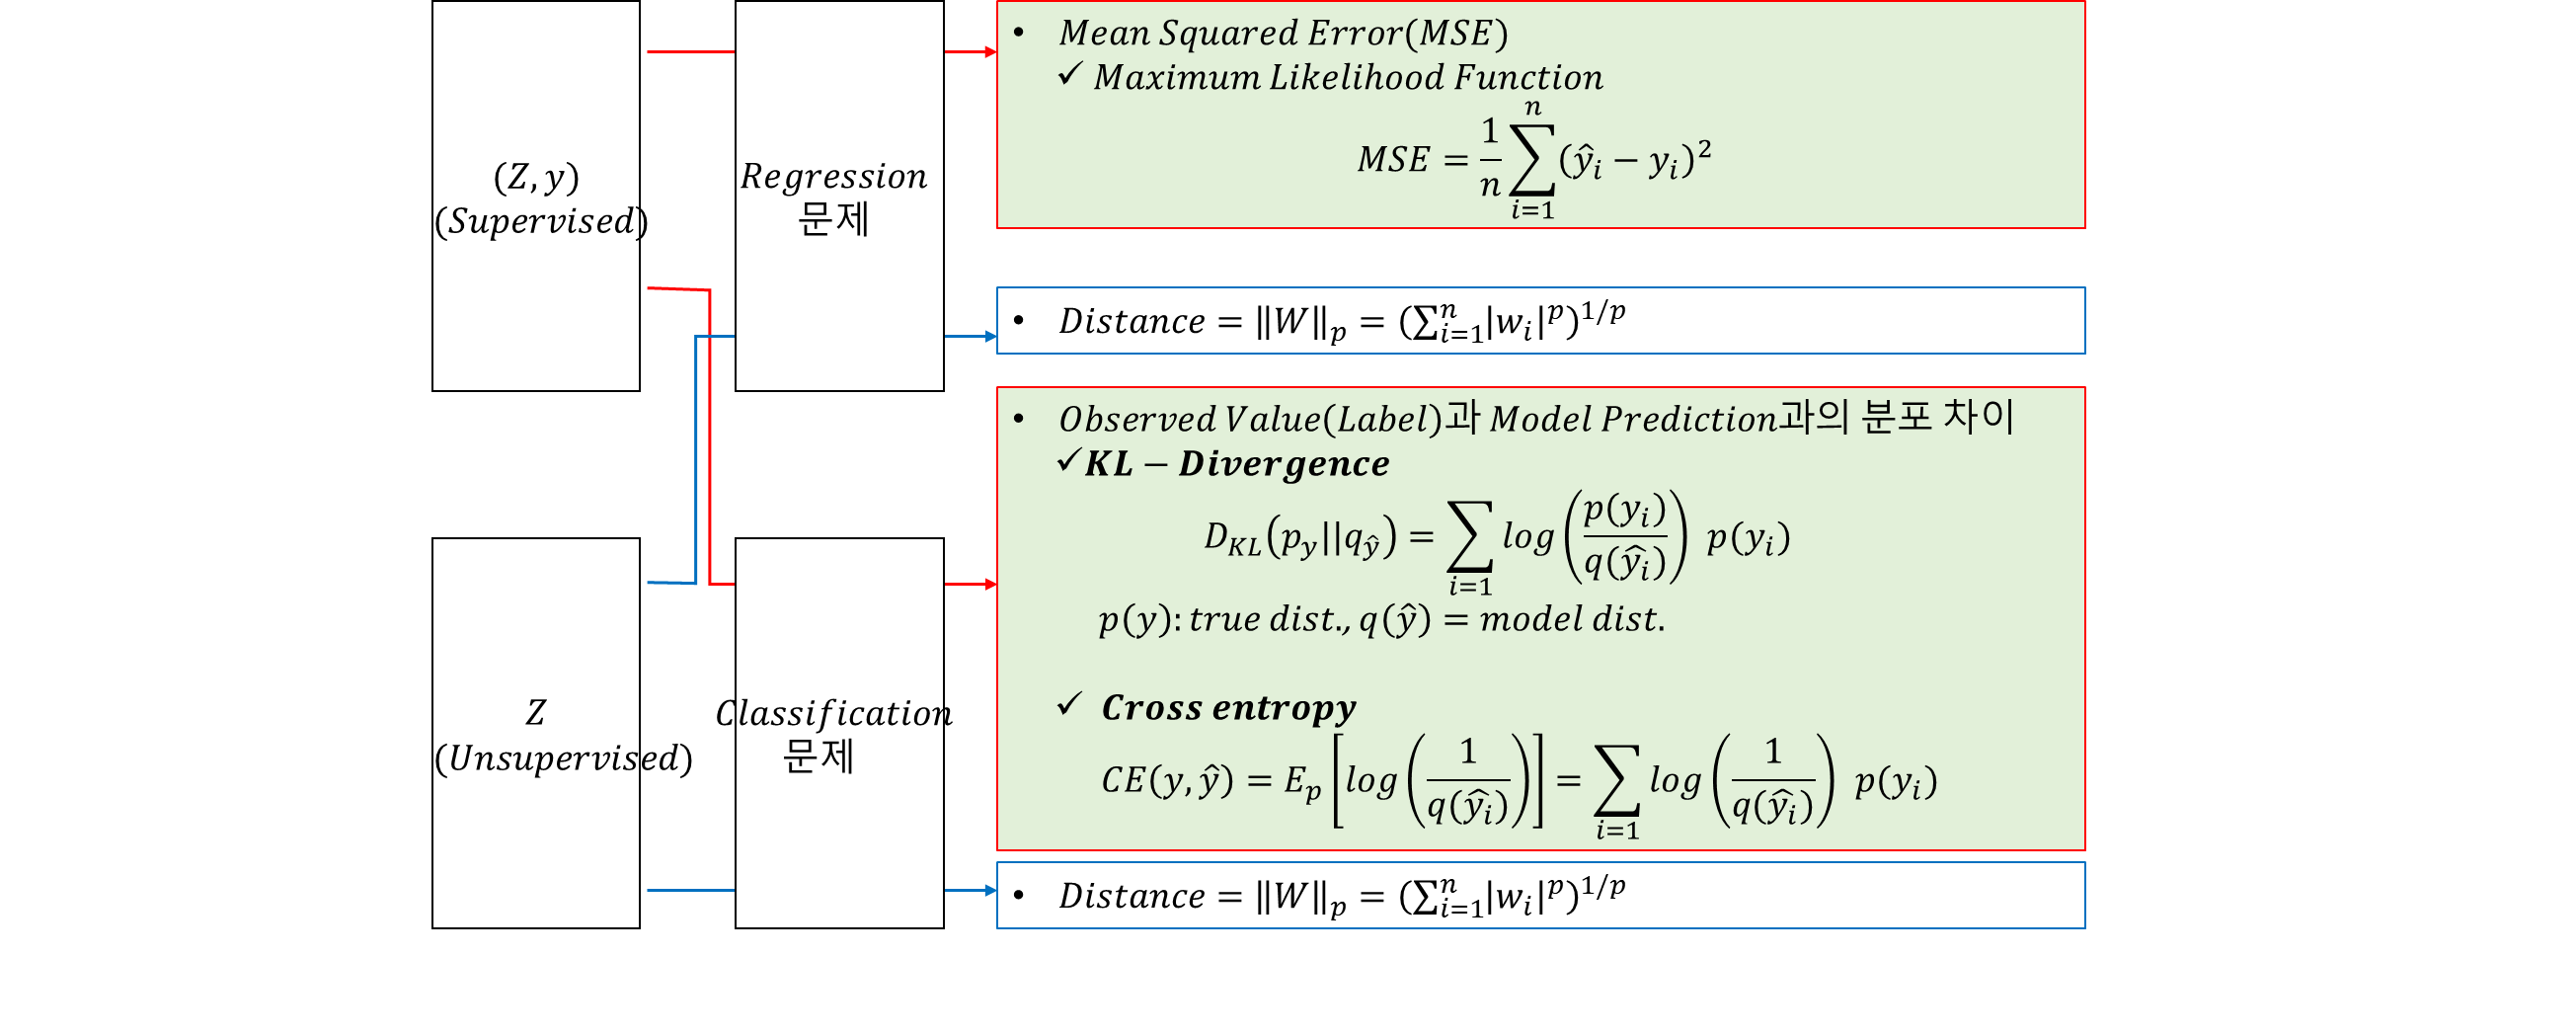

## 1. Regression의 Loss Function[복습]

### 1.1 Regression Model

$$
\begin{align}
Linear \ \ Regression :  y_i^{(l)} &= w_0^{(l)} + w_1^{(l)}z_{i,1}^{(l)} + \cdots +  
        w_{n_{l-1}}^{(l)} z_{i, n_{l-1}}^{(l)} + \varepsilon_i, i=1, \cdots n \\
                      E \left( \varepsilon_i^{(l)} \right) &= 0 \\
                      Var\left( \varepsilon_i^{(l)} \right) &= \sigma^2 \quad (Constant \ Variance)
\end{align}
$$

### 1.2 Regression Parameter의 추정
- Regression Parameter 추정에서, 목적함수(Objective function) $\sum_{i=1}^n \varepsilon_i^2$이 Loss function임
<span style="color:blue">
$$ 
\begin{align}
\underset{W}{minimize} \ \ Loss(W) &=  \sum_{i=1}^{n} \left( \varepsilon_i^{(l)} \right)^2  \\
subject \ to : y_i^{(l)} &= w_{0, i}^{(l)} + w_{1, i}^{(l)}z_{1}^{(l)} + \cdots +  
        w_{n_{l-1, i}^{(l)}} z_{n_{l-1}^{(l)}} + \varepsilon_i^{(l)}
\end{align}
$$
</span>

#### [생각해 보기 1]

- Linear Regression에는 다음과 같은 2개의 가정이 있음<br>

$ \quad \ $ (i) Model에 대한 가정<br>
$ \quad \ $ (ii) Model Error인 $\varepsilon$에 대한 가정<br>


- Model에 대한 가정의 의미를 설명할 수 있는가?<br>


- Erro항 $\varepsilon$에 대한 가정의 의미를 설명할 수 있는가?

## 2. Deep Neural Network의 Loss  Function과 Optimization Problem

### 2.1 Deep Neural Network의 Vector 표현

- $L$개의 hidden layer를 가지고 $l^{th}$ hidden layer에 $n_l$개의 선형변환된 node를 가지는  Deep Neural Network을 이용한 Approximation Model은 다음과 같음<br><br>

Notation | $\qquad \qquad$ 설명
:----:|:----
$$ \left( z^{(1)}, y \right) $$ |  $\bullet \ $ Dataset <br> $ \ \ $ $\checkmark \ $ $ y $   Label   data <br> $ \ \ $ $\checkmark \ $ $ z^{(1)} $ input vector  <br> $$ z^{(1)} = \left(  z_{1}^{(1)}, \cdots, z_{n_{0}}^{(1)} \right) $$
$$ z^{(l)} $$ | $\bullet \ $ $l^{th}$ hidden layer의 input vector <br> $$ z^{(l)} = \left(  z_{1}^{(l)}, \cdots, z_{n_{l-1}}^{(l)} \right) $$
$W^{(l)} $ |  $\bullet \ $ $ l^{th} \ hiddel \ layer의 \ weight \ parameter \ matrix  $
$$ y^{(l)} $$ | $\bullet \ $ $l^{th}$ hidden layer의 선형변환한 node vector <br> $$ y^{(l)} = \left(  y_{1}^{(l)}, \cdots, y_{n_{l}}^{(l)} \right) $$
$\sigma^{(l)}$ |  $\bullet \ $ $  l^{th} \ hiddel \ layer의 \ activation function $

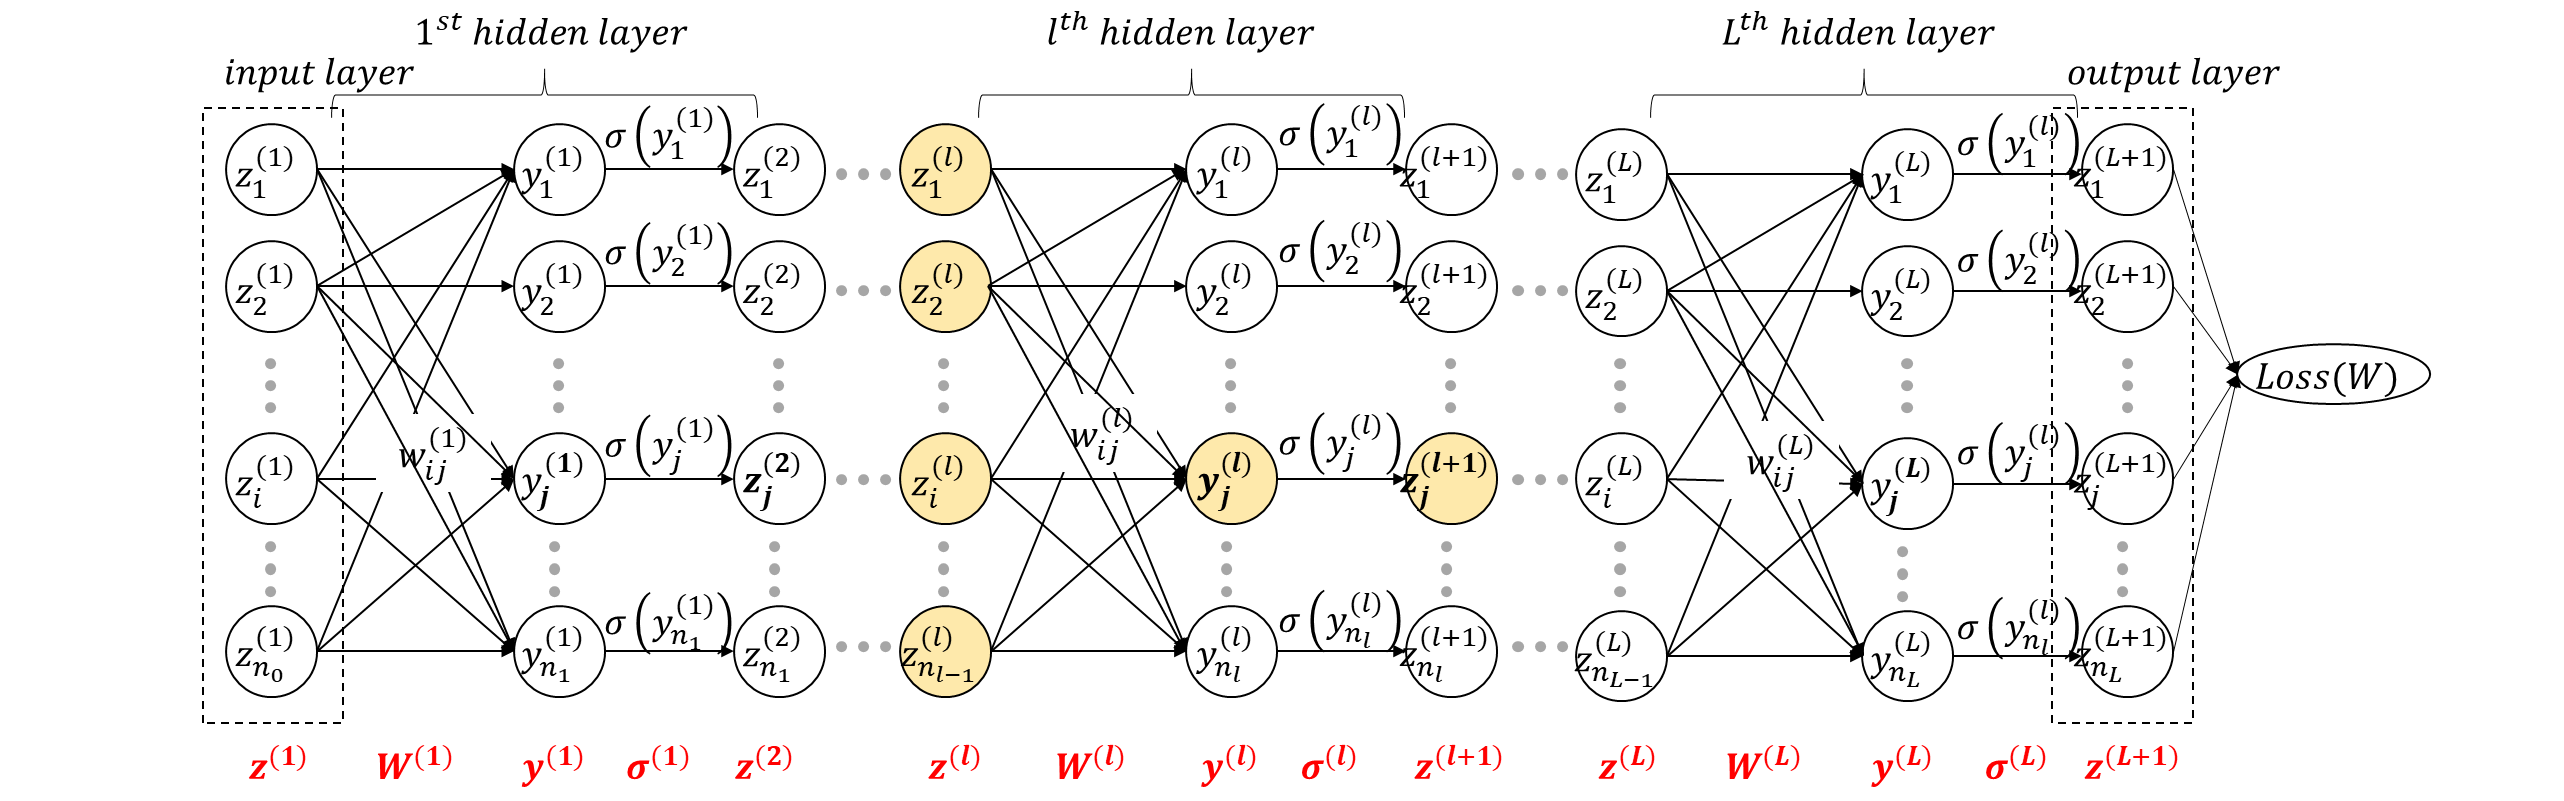

- $l^{th}$ layer에서 각 Node $y_i^{(l)}$ model

$$
\begin{align}
y_1^{(l)} =& w_{0,1}^{(l)} + w_{1,1}^{(l)} z_{1}^{(l)} + ... +  w_{n_{l-1},1}^{(l)} z_{n_{l-1}}^{(l)} + \varepsilon_1^{(l)} =w_1^{(l)} \cdot z^{(l)} + \varepsilon_1^{(l)} \quad (벡터내적으로 \ 표현한 \ 것)\\
y_2^{(l)} =& w_{0,2}^{(l)} + w_{1,2}^{(l)} z_{1}^{(l)} + ... +  w_{n_{l-1},2}^{(l)} z_{n_{l-1}}^{(l)} + \varepsilon_2^{(l)} =w_2^{(l)} \cdot z^{(l)} + \varepsilon_2^{(l)}  \\
\quad \vdots & \qquad \qquad \vdots  \qquad \qquad \qquad \qquad \qquad \qquad  \vdots  \\
y_{n_l}^{(l)} =& w_{0,{n_l}}^{(l)} + w_{1,{n_l}}^{(l)} z_{1}^{(l)} + ... +  w_{n_{l-1},{n_l}}^{(l)} z_{n_{l-1}}^{(l)} + \varepsilon_{n_l}^{(l)} =w_{n_l}^{(l)} \cdot z^{(l)} + \varepsilon_{n_l}^{(l)}
\end{align}
$$

- $l^{th}$ layer의 선형변환을 행렬을 이용한 표현

<span style="color:blue"> 
$$ 
\begin{align}
\underset{(n_l \times 1)}{y^{(l)}} =& \begin{bmatrix}
                                              w_1^{(l)} \\
                                              w_2^{(l)} \\
                                                \vdots \\
                                              w_{n_l^{(l)}}
                                      \end{bmatrix} z^{(l)} + \varepsilon^{(l)}  \\\\
                                   =& \underset{(n_l \times n_{l-1})}{W^{(l)}} \underset{(n_{l-1} \times 1)}{z^{(l)}} + 
                                      \underset{(n_l \times 1)}{\varepsilon^{(l)}}
\end{align}
$$
</span>
$\qquad \qquad $ 여기서 

$$
\begin{align}
& w_j^{(l)} = \left( w_{0, j}^{(l)}, w_{1, j}^{(l)}, ..., w_{n_l-1, j}^{(l)} \right) \\
& W^{(l)} = \begin{bmatrix}
w_1^{(l)}    \\
w_2^{(l)}    \\
\vdots     \\
w_{n_l}^{(l)}    
\end{bmatrix} , \quad z^{(l)} = \begin{bmatrix}
z_1^{(l)}    \\
z_2^{(l)}    \\
\vdots     \\
z_{n_l}^{(l)}    
\end{bmatrix}, \quad \varepsilon^{(l)} = \begin{bmatrix}
\varepsilon_1^{(l)}    \\
\varepsilon_2^{(l)}    \\
\vdots     \\
\varepsilon_{n_l}^{(l)}    
\end{bmatrix}
\end{align}
$$

$\quad$ $\Longrightarrow$ 즉, $l^{th}$ hidden layer에서의 선형변환은 <br>
$\qquad \qquad$ (i)  $ \left( n_{l-1} \times 1 \right) $ 크기의 input vector $z^{(l)}$을 <br>
$\qquad \qquad$ (ii)  $ \left( n_{l} \times n_{l-1}\right) $  크기의 matrix  $W^{(l)}$로 선형변환한 후 <br>
$\qquad \qquad$ (iii)  $ \left( n_{l} \times 1\right) $  크기의 오차항을 더한 것과 같음

### 2.2 Deep Neural Network Model

- Deep Neural Network은 Network을 이용한 Approximation방법이고 Network은 다음과 같은 2가지 Components로 구성되어 있음 <br><br>
$ \ \ $ $\checkmark \ $ Linear Regression을 이용한 선형변환<br>
<br>
$$
\begin{align}
y_j^{(l)} =& w_{0, j}^{(l)} + w_{1,j}^{(l)}z_{1}^{(l)} + \cdots +  
        w_{n_{l-1},j}^{(l)} z_{n_{l-1}}^{(l)} + \varepsilon_j^{(l)}, \\ 
          =& z^{(l)} w_j^{(l)}  + \varepsilon_j^{(l)}, \ \  j=1, \cdots, n_l, \ \ l=1, \cdots, L \\\\  
\end{align}$$ <br>
$ \ \ $ $\checkmark \ $ Activation function을 이용한 비선형변환(Nonlinear Transformation)<br><br>

$\qquad \qquad \qquad $ $
\begin{align}
            z_j^{(l+1)} = &\sigma^{(l)} \left( y_j^{(l)} \right)            \\  \\
       &\bullet ReLU: \ \ \ z_j^{(l+1)} = \sigma^{(l)} \left( y_j^{(l)} \right) = max \left( y_j^{(l)}, 0 \right)  \\
       &\bullet Sigmoid: z_j^{(l+1)} = \sigma^{(l)} \left( y_j^{(l)} \right) = \frac{1}{1+e^{- y_j^{(l)}}}     \\
       &\bullet  tanh: \quad \ \ \ z_j^{(l+1)} = \sigma^{(l)} \left( y_j^{(l)} \right) = \frac{e^{ y_j^{(l)}}-e^{- y_j^{(l)}}}  {e^{ y_j^{(l)}}+e^{- y_j^{(l)}}} \\
        &\bullet Softmax: p_j = z_j^{(L)} = \frac{e^{y_j^{(L)}}}{\sum_{k=1}^{C} e^{y_k^{(L)}}}, \ \ C는 \ Class 수
\end{align}
$

- 최종 Output $z^{(L+1)}$은 다음과 같이 표현할 수 있음

<span style="color:red">
$\qquad \qquad $ $
\begin{align}
Deep \ Neural & \ Network \ Model: \\\\
\quad & y = z^{(L+1)} =  \sigma^{(L)} W^{(L)} \ \cdots \ \sigma^{(2)} W^{(2)} \sigma^{(1)} W^{(1)} z^{(1)} + \varepsilon \\\\
      & \hat y = z^{(L+1)} =  \sigma^{(L)} \hat W^{(L)} \ \cdots \ \sigma^{(2)} \hat W^{(2)} \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right)
\end{align}
$
</span>

### 2.3 Deep Neural Network의 Optimization Problem


- Deep Neural Network을 학습시키기 위해 다음과 같은 dataset을 가지고 있음<br>
$ \ \ $ $\checkmark \ $ $n$개의  data $ \left( z_i^{(1)}, y_i \right), \ i=1, ..., n$를 관측함

$$
\begin{align}
Z^{(1)} =
\begin{bmatrix}
 z_{1}^{(1)}  \\
 z_{2}^{(1)}  \\
\vdots   \\
 z_{n}^{(1)}  \\
\end{bmatrix} =
\begin{bmatrix}
 z_{11}^{(1)} \ z_{12}^{(1)} & \cdots & z_{1,n_{_0}}^{(1)} \\
 z_{21}^{(1)} \ z_{22}^{(1)} & \cdots & z_{2,n_{_0}}^{(1)} \\
\vdots \ & \ddots & \vdots \\
 z_{n1}^{(1)} \ z_{n2}^{(1)} & \cdots & z_{n,n_{_0}}^{(1)} \\
\end{bmatrix}, \ \ 
y = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix} \\
\end{align} \\\\
$$



- Weight parameter $W^{(l)}$는 $Loss \ function$을 최소화하는 $W^{(l)*}$로 결정함 <br>
$ \ \ $ $\checkmark \ $  Deep Neural Network에 사용되는 $Loss \ function$은 주어진 문제가 Regression인가?  Classification문제인가?에 <br> $\quad \ \ $ 따라 다음과 같은 2 종류의 Loss function을 사용함

문제 유형 | $\qquad \qquad$ Loss function
:----: | :----
<br> Regression  문제 | <br> $\bullet \ $ Mean Squqred Error <br> $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - \hat y_i \right)^2 $$
<br> Classification  문제 | <br> $\bullet \ $ Cross Entropy <br> $$\begin{align}   CE \left(y, \hat y  \right) \ =& \  E_p \left[ log \left(\frac{1}{q \left( \hat y_i \right)} \right) \right] \\ =& \sum_{i=1}^C log \left(\frac{1}{q \left( \hat y_i \right)} \right) p \left( y_i \right) \end{align}$$

#### (1) Regression문제의 Loss function인 $MSE$와 Optimization Problem


- Regression문제에서 Weight Parameter $W^{(l)}$를 구하기 위한 Loss function으로 $ MSE \left(y_i, \hat y_i  \right)$를  사용<br>
$ \ \ $ $\checkmark \ $  여기에서 말하는 Regression문제라는 의미는 $y$가 실수 값이며, Deep Neural Network을 이용하여 <br> $\quad \ \ \  $ approximation한 값인 $\hat y$도 실수 값을 가진다는 것을 의미함<br>
$ \ \ $ $\checkmark \ $  <span style="color:red">Risk인 $E \left( MSE \left( y_i, \hat y_i \right) \right)$가 정확한 Loss 평가 방법이지만   Machine Learning에서는 간이 계산인 $ MSE \left( y_i, \hat y_i \right)$를 <br> $\quad \ \ $ 사용하고 있음</span>

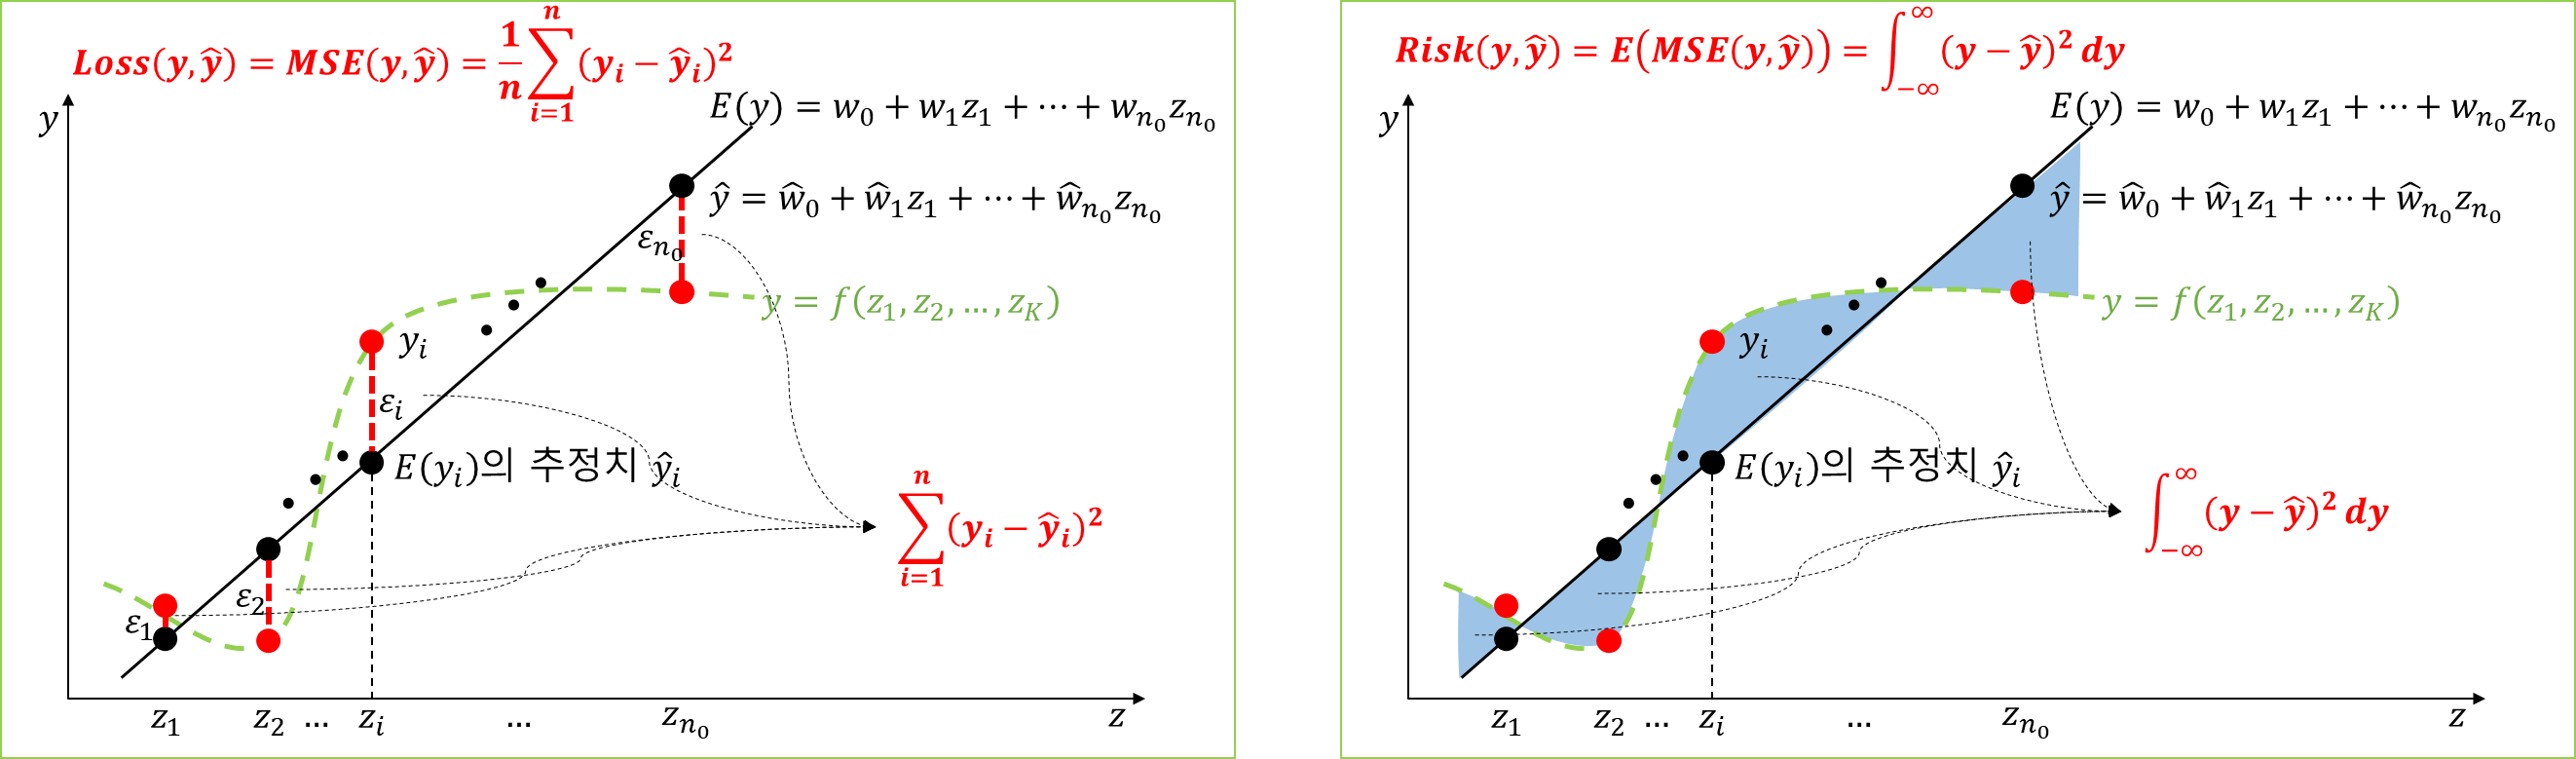

#### Optimization Problem 1: Deep Neural Network Model의 Regression Problem 

><span style="color:blue">    
>$$ 
\begin{align}
& Deep \ Neural \ Network의 \ Regression \ Model의 \ Optimization \ Problem \\
& \qquad \underset{w}{minimize} \ \ Loss(W) =  MSE\left(y_i, \hat y_i  \right) = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - \hat y_i \right)^2  \\
& \qquad subject \ to \ \ \hat y_i \ = \ \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(2)} \hat W^{(2)} \sigma^{(1)} \hat W^{(1)} \left( z_{i}^{(1)} \right)
\end{align}
$$
</span>

#### [생각해 보기 2 ]

- Deep Neural Network을 통해 Approximation한 결과 $\hat y_i$가 Label  $ y_i$ 값보다 클 수도 있고 작을 수도 있다<br>


- $\hat y_i > y_i$ 인 경우 $\hat y_i \le y_i$ 인 경우 보다 더 큰 Loss를 부여하고 싶다면 기존 MSE를 어떻게 변형시킨  Loss Function을 사용해야하는가?

#### (2) Classification 문제의 Loss function: $Cross Entropy \ CE$
- Classification 문제에서 최적의 weight parameter $W^{(l)}$를 구하기 위한 Loss function으로 $ Cross \ Entropy \ CE\left( y, \hat y \right)$를  사용 <br>

Notation | $ \qquad \qquad $ 설명
:----:|:----
$$ y $$ | $\bullet \ $ Label 
$$ \hat y $$ | $\bullet \ $ Deep Neural Network로 approximation한 결과값
$$ p(y) $$ | $\bullet \ $ Label $y$의 확률분포
$$ q \left( \hat y \right) $$ | $\bullet \ $ Deep Neural Network로 approximation한 결과값의  확률분포

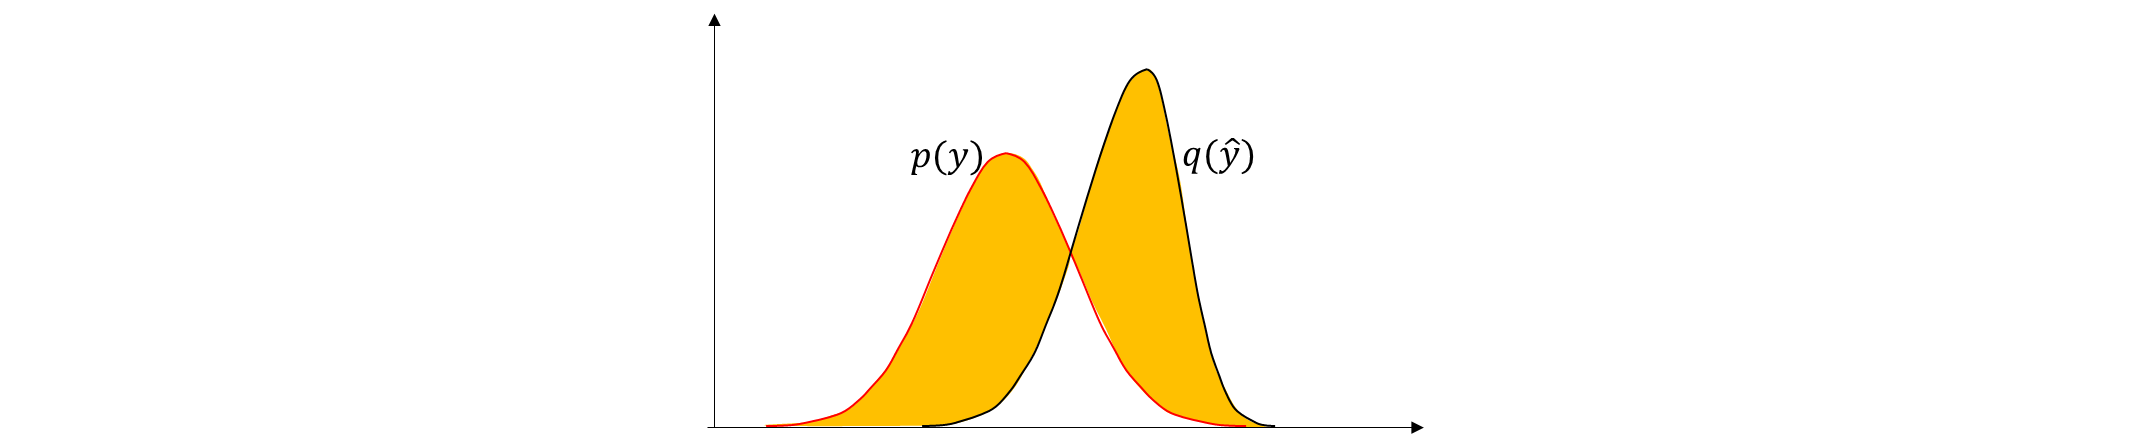

#### Optimization Problem 2: Deep Neural Network Model의 Classification Problem 

><span style="color:blue">
>$$ 
\begin{align}
& Deep \ Neural \ Network의 \ Classification \ Model의 \ Optimization \ Problem \\
& \qquad \underset{W}{minimize} \ \ Loss(W) =  CE \left(y, \hat y  \right) \ = \  E_p \left[ log \left(\frac{1}{q \left( \hat y_i \right)} \right) \right]= \sum_{i=1}^C log \left(\frac{1}{q \left( \hat y_i \right)} \right) p \left( y_i \right)  \\
& \qquad subject \ to \ \ \hat y_i \ = \ \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(2)} \hat W^{(2)} \sigma^{(1)} \hat W^{(1)} \left( z_i^{(1)} \right)
\end{align}
$$
</span>

In [1]:
import numpy as np
# observed: y , predicted: Neural Network으로 추정한 값 
def mean_squared_error(observed, predicted):
    sum_square_error = 0.0
    for i in range(len(observed)):
        sum_square_error = sum_square_error + (observed[i] - predicted[i])**2.0
    mean_square_error = 1.0 / len(observed) * sum_square_error
    return mean_square_error

observed = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
predicted = np.array([0.1, 0.03, 0.05, 0.2, 0.9, 0.0, 0.1, 0.2, 0.12, 0.03])

mean_squared_error(observed, predicted)

0.012870000000000005

- Binary Cross Entropy: Class가 2개인 경우

In [2]:
# calculate binary cross entropy
def binary_cross_entropy(observed, predicted):
    sum_score = 0.0
    for i in range(len(observed)):
        sum_score += observed[i] * np.log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(observed) * sum_score
    return - mean_sum_score

binary_cross_entropy(observed, predicted)

0.010536051565782517

- Cross Entropy

In [3]:
def categorical_cross_entropy(observed, predicted):
    delta = 1e-7 #아주 작은 값 (y가 0인 경우 -inf 값을 예방) 
    return -np.sum(observed * np.log(predicted + delta)) / observed.shape[0]

categorical_cross_entropy(observed, predicted)

0.01053604045467214

#### [생각해 보기 3]

- 2개의 확률분포 $p, q$가 다음과 같다고할 때, <br>
$ \ \ $ $\checkmark \ $Label $y \sim p(y)$이고 Deep Neural Network으로 Approximation한 $\hat y \sim q \left( \hat y \right)$일 때 <br>
$ \ \ $ $\checkmark \ $ Kullback $-$ Leibler Divergence와 CrossEntropy는 다음과 같다. 둘 사이에는 어떤 관계가 있을까?

$$
\begin{align}
D_{KL} (p \| q ) =& E_p \left[ log \left( \frac{p}{q} \right) \right] \\\\
CE(p, q) =& E_p \left[ log \left(\frac{1}{q } \right) \right]
\end{align}
$$

## 3. Deep Neural Network에서의 Loss  Function의 특징

### 3.1 Loss Function의 복잡성

[참고자료 1] Hao Li , Zheng Xu , Gavin Taylor , Christoph Studer , Tom Goldstein, Visualizing the Loss Landscape of <br> $\qquad \qquad \ \ $ Neural Nets, arXiv:1712.09913v3 [cs.LG] 7 Nov 2018<br>
[참고자료 2] Lifu Wang , Bo Shen , Ning Zhao and Zhiyuan Zhang, Is the Skip Connection Provable to Reform the  <br> $\qquad \qquad \ \ $ Neural Network Loss Landscape?, arXiv:2006.05939v1 [cs.LG] 10 Jun 2020<br> 

- Deep Neural Network 문제<br><br>
<span style="color:blue">
$$ 
\begin{align}
& \underset{W}{minimize} \ \ Loss(W)   \\
& subject \ to \ \  y_i \ = \ \sigma^{(L)}  W^{(L)} \cdots \sigma^{(2)}  W^{(2)} \sigma^{(1)} W^{(1)} \left( z_i^{(1)} \right) +\varepsilon_i, \quad i=1,..., n
\end{align}
$$
</span>
<br>
- Hidden layer 수가 많은 deep neural network의  $Loss(W)$는  매우 복잡한 함수임<br>
$ \ \ $ $\checkmark \ $ $Loss(W)$는 Convex Function이 아님<br>
$ \ \ $ $\checkmark \ $ 많은 수의 (Local) Minimum, (Local) Maximum, Saddle point를 가진 함수임<br>

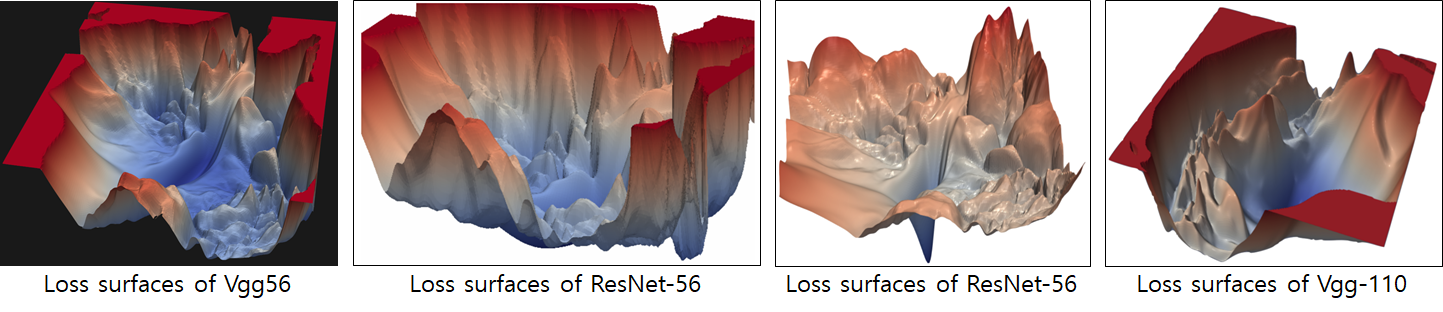

$ \ \ $ $\Longrightarrow \ $ $ \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}}=0$를 만족하는 $w_{i,j}^{(l)*}$를 찾기위해  Gradient Descent로 구한 해 $ w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho \left( \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)} } \right)$ 가 <br> $\qquad \ \ $ Global Optimal Solution이라는 보장은 없고 Local Optimal Solution임

#### [생각해보기 4]

- Deep Neural Network을 이용해 Approximation한 $\hat y_i$가 Input vector $z^{(1)}$의 작은 변화에 Sensitive하다면 $\hat y_i$는 좋은 Approximation 값이라고 말하기 어렵다


- $w_{i,j}^{(l)}$의 작은 변화에 $\hat y$가 Sensitive한 $\hat y_i$ 인지 아닌지 어떻게 확인할 수 있을까?



- Robust한 $\hat y_i$를 구하는 방법은 무엇일까?

### 3.2 Loss Function의 (Local) Minimum 찾기

#### (1) Deep Neural Network에서 최적 Parameter값 $w_{i,j}^{(l)*}$ 찾기

-  $w_{i,j}^{(l)}$에 대한 Loss에 대한 미분값은 다음 식과 같이 합성함수의 미분임 <br>

$$
\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}   }
   = \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
     \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
     \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
     \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
     \frac{\partial y^{(l+3)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
     \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
     \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
     \frac{\partial Loss(W)} {\partial z^{(L+1)}     }  
$$<br>

- $Loss(W)$를 최소로하는 $w_{i,j}^{(l)*}$는 다음과 같은 Gradient Descent를 이용하여 구할 수 있음<br>

$$ 
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho \ \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}} 
$$

$ \qquad $ $\checkmark \ $ $w_{i,j}^{(l)*}$는 $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}}=0$일 때임<br>

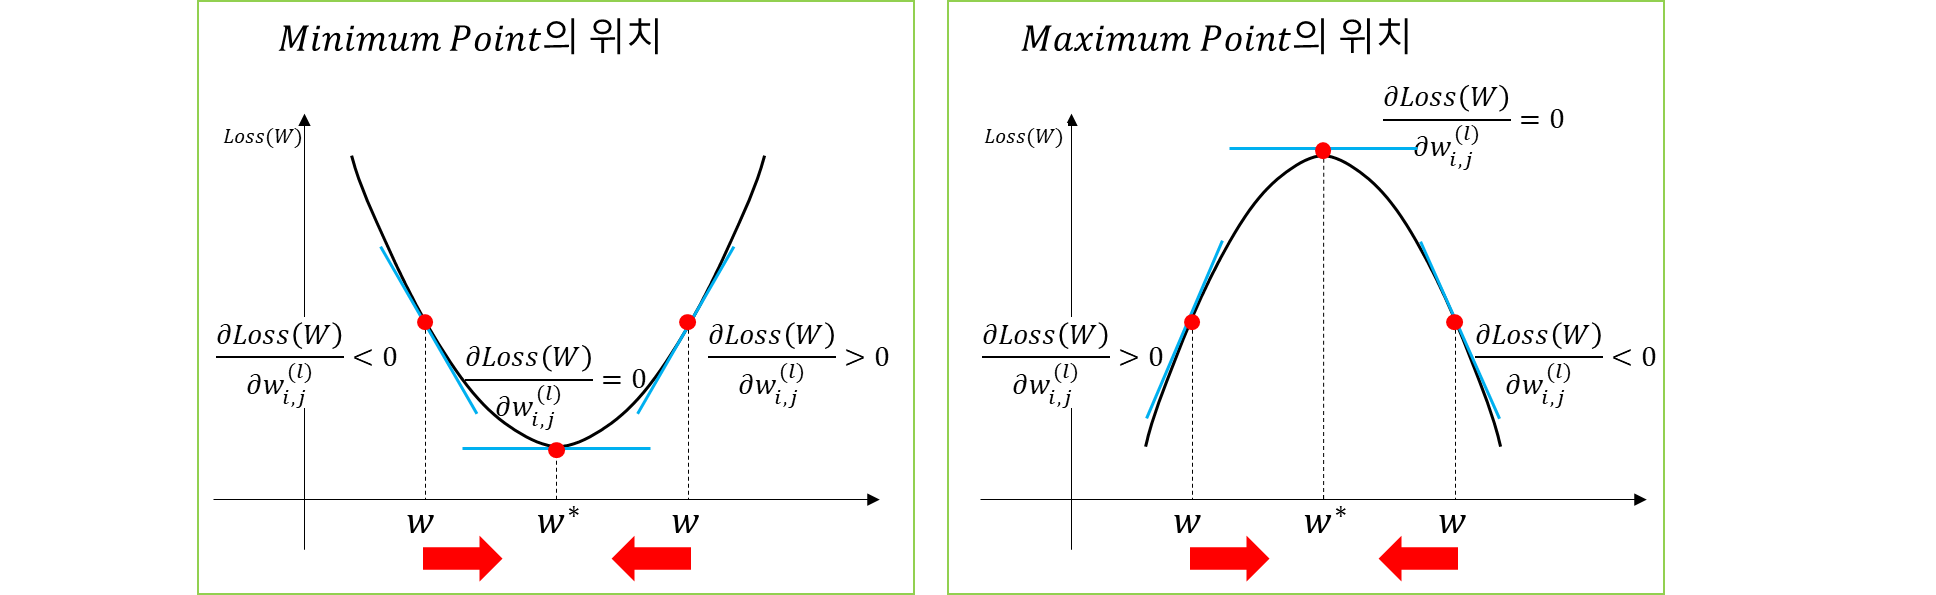

#### (2) Gradient Descent 방법을 이용한 최적해는 Local Minimum

- 합성함수의 미분을 이용해서 구한 $w_{i,j}^{(l)*}$는  국소최소값(Local Minimum)값임
- 즉, Deep Neural Network문제는 수많은 Local Minimum이 존재하는 문제이고, 우리가 Backpropagation과 Gradient Descent를 이용해 구한 최적해  $w_{i,j}^{(l)*}$는 수많은 local minimum 중의 하나임

#### [참고]

[참고자료] <br>
>- Bounded Activation Function을 사용하고 Hidden Layer수가 3개 미만일 때, Deep Neural Network 문제에 대해 Gradient Descent로 구한 Solution은 Optimal Solution임
>
>
>- 보다 강력한 Activation Function을 시ㅏ용하여 Hidden Layer 수를 3개 이해로 줄일 수 있는 방법이 있다면 항상 Global Optimal Solution임을 보장할 수 있게 됨

#### [생각해 보기 5]

- Deep Neural Netwok의 모든 Hidden Layer에서의 선형변환에 대해서는 Loss function $Loss(W)$을 최소화하는 $W$를 찾고 있지만 비선형함수 $\sigma$에 대해서는 최적화가 적용되고 있지 않음<br>


$ \qquad $ (i) 비선형변환 $\sigma$에 최적화 과정이 적용되지 않아도 되는 타당한 근거가 있는 것일까?


$ \qquad $ (ii) 만약 비선형변환에 최적화를 적용한다면 어떻게 해야할까?


$ \qquad $ (iii) 비선형변환에 최적화를 사용하지 않아도 Deep Neural Network이 잘 작동하는 이유는 무엇일까?

## 4. [참고] Optimization Theory

- 최적화 이론에 대한 일반적인 내용임

### 4.1 Machine Learning에서 다루는 Optimization 문제
####  (1) Problem 1: 제약식이 없는 극대, 극소문제

- Machine Learning Model의 학습 문제는 Objective Function(Loss Function) $Loss(W)$를 최소화하는 Model의 Parameter  최적 값  $W^*$을 찾는 문제임
<br><br>
<span style="color:red">
$$Objective \ \ function: \ \ \underset{W}{minimize} \ \ Loss(W)$$
   </span>
   <br>
여기서 $Loss(W) = MSE = \frac{1}{n} \sum_{i=1} \left( y_i - \hat y_i \right)^2$ 또는 
$Loss(W)=E_p \left( log \left( \frac{1}{q} \right) \right) = \sum_{i=1}^{n} log \left( \frac{1}{q(\hat y_i)} \right) p(y_i)$
- 극대, 극소점은 다음 조건을 만족하는 Critical Point $W^*$를 찾는 문제임

$$ 
W^* =  \underset{W}{arg} \left( \frac{\partial Loss(W)}{\partial W} = 0 \right)
$$

####  (2) Problem 2: 제약식이 있는 극대, 극소문제
- 최소화화야할 Loss Function 뿐 아니라 제약조건이 있는 경우는  Lagrangian method를 이용하여 해결함<br>
$ \ \ $ $\checkmark \ $ 제약식의 부등호 방향에 주의
<br>
<br>
<span style="color:red">
$$
\begin{align}
Objective \ \ function: \ \  \underset{W}{minimize} \ \ & Loss(W) \\
Constraint: \ \  subject \ \ to \ \ \        & g_i(W) \le 0, i=1,..., m              \\
                             &h_j(W)=0,     j=1,..., k  
\end{align}
$$
</span> <br>

$ \qquad $ $\checkmark \ $ 제약식이 있는 Optimization Problem은 Lagrangian multiplier $ u_i$와 $ v_i$를 도입하여 제약식이 없는  <br> $\qquad \quad $ 문제로 다음과 같이 쓸 수 있음

<span style="color:blue">
\begin{align}
Objective \ \ function: \ \  \underset{W}{minimize} \ \ & Loss(W) + \sum_{i=1}^{m} u_i g_i (W) + \sum_{j=1}^{k} v_j h_j(W)  \\
Constraint: \ \  subject \ \ to \ \ \        & u_i \ge 0, \  i=1,..., m              \\
                                             & v_j  \ge 0, \  j=1,..., k   
\end{align}
</span>

### 4.2 회귀분석(Regression)이나 Deep Neural Network 문제는  (Problem 2) 유형의 문제임<br>
- Regression 문제<br>
<br>
<span style="color:red">
$$
\begin{align}
Objective \ \ function: \ \  \underset{w}{minimize} \ \ &Loss(W) = \sum_{i=1}^{n} \varepsilon_i^2 \\
Constraints: subject \ \ to  \ \        &y_i = w_0 + w_1 z_{i1} + ... + w_{n_{_0}} z_{i, n_{_0}} + \varepsilon_i, \ \  i=1,..., n    
\end{align}
$$
   </span> <br><br>
단, Logistic Regression 문제의 경우 $Loss(w)$가 Cross Entropy로 변경
<br>
<br>
- Deep Neural Network 문제<br>
<br>
<span style="color:red">
$$
\begin{align}
Objective \ \ function: \ \  \underset{w}{minimize} \ \ &Loss(W) = \sum_{i=1}^{n} \left( y_i - \hat y_i \right) \\
Constraints: \ \ subject \ \ to \ \ \ & \hat y_i = \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right), \ \ i=1, ..., n
\end{align}
$$
   </span> <br><br>
   단, Neural Network 문제의 경우 $W^{(i)}$는 Layer $i$의 Linear Transformation Matrix, $\sigma^{(i)}$는 Activation function이라고 부르는 Non-linear Transformation임

### 4.3 Maximum, Minimum과  Saddle Points
#### (1) 임계점(Critical Point)

- 임계점(臨界點, Critical Point) 또는 정류점(定流點) 또는 정상점(定常點)은 함수의 미분함수가 0이 되는 점을 말함
- 미분가능한 실수함수 $Loss: R^{n_{_0}} \rightarrow R$의 임계점은 다음이 성립하는 점 $W^*$임<br>
$ \ \ $ $\checkmark \ $ 여기서 $W = \left(W^{(1)}, W^{(2)}, \cdots, W^{(L)} \right)$이고

$$ 
\frac{\partial Loss(W)}{\partial W} = 0 
$$

$ \qquad $ $\checkmark \ $ $W$ matrix의 모든 component $w_{i,j}^{(l)}$로 $Loss$를 미분한 값이 0이 되는 점 $w_{i,j}^{(l)*}$

$$ 
\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}} = 0, \ \ \ \forall \ i, j, l 
$$

- $w_{i,j}^{(l)*}$는 Critical Point로 다음 3 점 중의 하나임<br>
>(1) 극대점(local maximum)<br>
(2) 극소점(local minimum)<br> 
(3) 또는 안장점(saddle point)

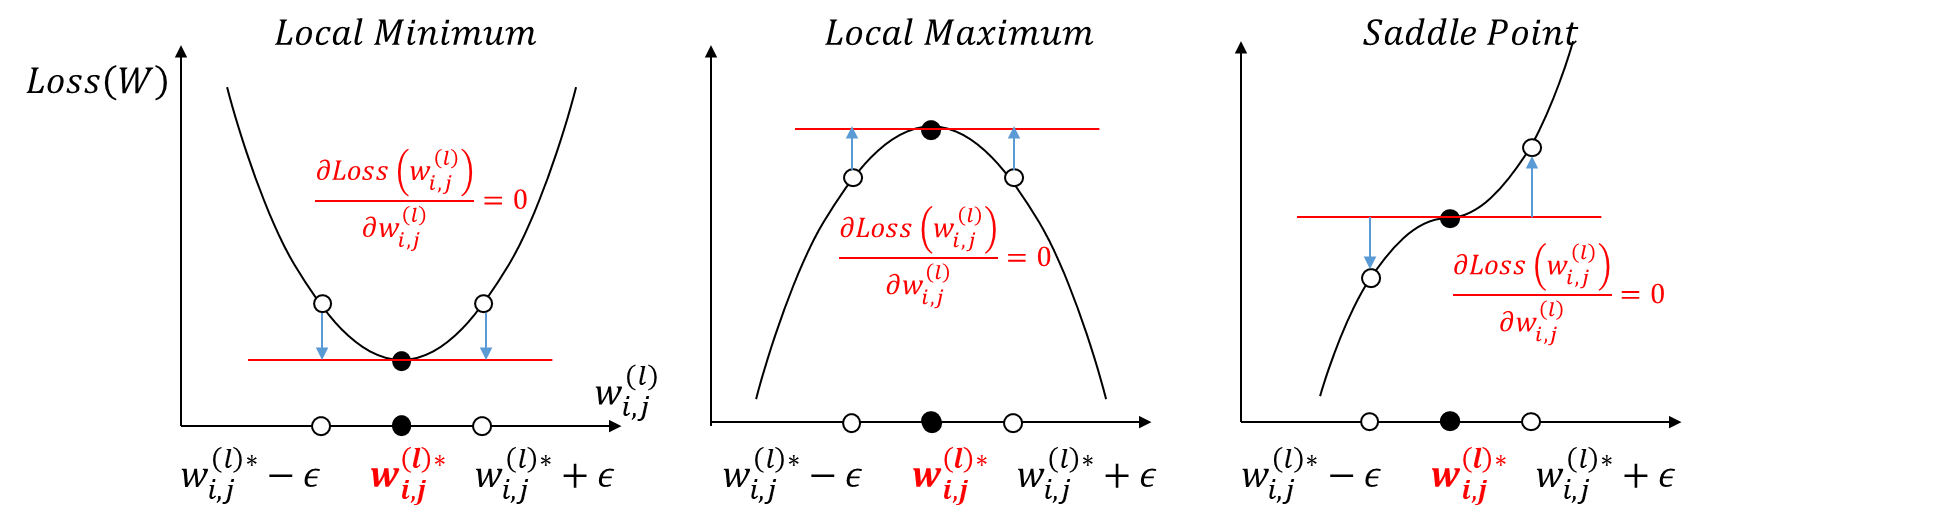

#### (2) Critical Point $w^*$에서 Hessian Matrix $H$의   $eigenvalues$를 이용한  극대, 극소, 안장점 판정

- $W = \left( W^{(1)}, W^{(2)}, ..., W^{(L)} \right)$이고 $W^{(l)}$ matrix는 $\left( n_{l}-1 \right) \times n_l$ matrix이고 $w_{.j}^{(l)} = \left( w_{1j}^{(l)}, w_{2j}^{(l)}, ..., w_{n_l - 1, j}^{(l)} \right)$라고하자 <br>
$ \ \ $ $\checkmark \ $ 즉,  $w_{.j}^{(l)}$는 $l^{th}$ hidden layer에서 node $y_j^{(l)}$로 연결되는 parameter vector<br>
- $Loss(W)$를 $w_{.j}^{(l)}$로 편미분한 Jacobian은 다음과 같음

$$
\begin{align}
J =& 
\frac{\partial Loss(W)}{\partial w_{.j}^{(l)}} \\
=& \left(
\frac{\partial Loss(W)}{\partial w_{1, j}^{(l)}}, 
\frac{\partial Loss(W)}{\partial w_{2, j}^{(l)}}, ..., 
\frac{\partial Loss(W)}{\partial w_{n_l - 1, j}^{(l)}}
\right)
\end{align}
$$ <br>

$ \qquad $ $\checkmark \ $ $J = 0$를 만족하는 Critical Point를 $w_{.j}^{(l)*}$라고 하자

- Jacobian $J$를  $w_{.j}^{(l)}$로 한번 더 편미분한 Hessian은 다음과 같음

$$
\begin{align}
H =& \
\frac{\partial J}{\partial w_{.j}^{(l)}} \\
=& \frac{\partial }{\partial w_{.j}^{(l)}}
\left(
\frac{\partial Loss(W)}{\partial w_{1, j}^{(l)}}, 
\frac{\partial Loss(W)}{\partial w_{2, j}^{(l)}}, ..., 
\frac{\partial Loss(W)}{\partial w_{n_l - 1, j}^{(l)}}
\right) \\\\
=& \ 
\begin{bmatrix}
\frac{\partial^2 Loss(W)}{\partial w_{1, j}^{(l)} \partial w_{1, j}^{(l)}} &  
\frac{\partial^2 Loss(W)}{\partial w_{1, j}^{(l)} \partial w_{2, j}^{(l)}} & 
\cdots & 
\frac{\partial^2 Loss(W)}{\partial w_{1, j}^{(l)} \partial w_{n_l - 1, j}^{(l)}}  \\
\frac{\partial^2 Loss(W)}{\partial w_{2, j}^{(l)} \partial w_{1, j}^{(l)}} &  
\frac{\partial^2 Loss(W)}{\partial w_{2, j}^{(l)} \partial w_{2, j}^{(l)}} & 
\cdots & 
\frac{\partial^2 Loss(W)}{\partial w_{2, j}^{(l)} \partial w_{n_l - 1, j}^{(l)}}  \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 Loss(W)}{\partial w_{n_l - 1, j}^{(l)} \partial w_{1, j}^{(l)}} &  
\frac{\partial^2 Loss(W)}{\partial w_{n_l - 1, j}^{(l)} \partial w_{2, j}^{(l)}} & 
\cdots & 
\frac{\partial^2 Loss(W)}{\partial w_{n_l - 1, j}^{(l)} \partial w_{n_l - 1, j}^{(l)}} 
\end{bmatrix}
\end{align}
$$<br>

- Hessian matrix $H$는 Symmetric Matrix임<br>
$ \ \ $ $\because$ $ \frac{\partial^2 Loss(W)}{\partial w_{k,j}^{(l)} \partial w_{l,j}^{(l)} } = \frac{\partial^2  Loss(W)}{\partial w_{l,j}^{(l)} \partial w_{k,j}^{(l)} }$

- Hessian matrix $H$와 Vector $w_{.j}^{(l)}$에 대해 $Hw_{.j}^{(l)} = \lambda w_{.j}^{(l)}$를 만족하는 $\lambda_i$들을 $eigenvalues$라고 함

- 함수 $Loss(W)$의 Critical Point $w_{.j}^{(l)*}$에서 $Hessian \ \ Matrix \ \ H = \left( \frac{\partial^2 Loss(W)}{ \partial w_{.j}^{(l)*} \partial w_{.j}^{(l)*} } \right)_{lm}$에 대해
- $H$의 $eigenvalues$들 $ \lambda_1, ..., \lambda_{p}$라고 할 때<br>

$$
\begin{align}
if \ \lambda_i >& 0, \ for \ \ all \ \ i \ \rightarrow \ w_{.j}^{(l)*}는 \  Local \ Minimum \ point \\
if \ \lambda_i <& 0, \ for \ \ all \ \ i \ \rightarrow  \ w_{.j}^{(l)*}는 \ Local \ Maximum \ point \\
if \ \lambda_i \ge& 0 \ \ and \ \ \lambda_j \le 0  \ \rightarrow  \ w_{.j}^{(l)*}는 \ Saddle \ point 
\end{align}
$$

#### (3) Critical Point $w_{.j}^{(l)*}$에서 Hessian Matrix $H$의   Quaddratic Form을 이용한  극대, 극소, 안장점 판정
- Hessian Matrix $H$와 Critical Point $w_{.j}^{(l)*}$에 대한 Quadratic Form $Q \left( w_{.j}^{(l)*} \right) = {w_{.j}^{(l)*}}' H w_{.j}^{(l)*}$을 생각하자<br>

$$
\begin{align}
Q \left( w_{.j}^{(l)*} \right) =& {w_{.j}^{(l)*}}'H w_{.j}^{(l)*} \ \gt 0 \rightarrow  \ w_{.j}^{(l)*}는 \ Local \ Minimum  \ point \\
Q \left( w_{.j}^{(l)*} \right) =& {w_{.j}^{(l)*}}'H w_{.j}^{(l)*} \ \lt 0 \rightarrow  \ w_{.j}^{(l)*}는 \ Local \ Maximum  \ point \\
Q \left( w_{.j}^{(l)*} \right)의 & \ 부호가 \ 다르면 \quad \ \  \rightarrow  \ w_{.j}^{(l)*}는 \ Saddle  \ point
\end{align}
$$

### 4.4 Lagrange Dual Problem과 Karush-Kuhn-Tucker Conditionsdls

#### (1) Constraints가 있는 Original Problem

<span style="color:red">
$\qquad$ [Original  Problem]
    
$$
\begin{align}
& Objective \ \ function: \ \  \underset{W}{minimize} \ \  Loss(W) \\
& Constraints: \qquad \quad \  subject \ \ to \ \ \  g_i(W) \le 0, \ \ \ i=1,..., m  \\
& \qquad \qquad  \qquad \qquad \qquad \qquad  \ \ \   h_j(W)=0, \ \ \ j=1,..., k  
\end{align}
$$
   </span>

####  (2) Lagrange  Method

- 라그랑주 승수법(Lagrange multiplier method)은 제약이 있는 최적화 문제를 푸는 방법임
- 최적화하려 하는 값에 형식적인 라그랑주 승수(Lagrange multiplier) $u_i, v_j$를 이용하여, 제약식이 있는 문제를 제약이 없는 문제로 변환함
<br>

<span style="color:red">
    
$$
\begin{align}
& Objective \ \ function: \ \  \underset{W}{minimize} \ \  Loss(W, u, v) = Loss(W) + \sum_{i=1}^{m} u_{i} g_{i}(W) + \sum_{j=1}^{k} v_{j} h_{j}(W) \\
& Constraints: \qquad \quad \  subject \ \ to \ \ \  u_i \ge 0, \ \ \ i=1,..., m  \\
& \qquad \qquad  \qquad \qquad \qquad \qquad  \ \ \  v_j \ge 0, \ \ \ j=1,..., k  
\end{align}
$$
   </span>
   
$\qquad \qquad $ 여기서 $u_i \in R^m, v_j \in R^k, \ u_i >0, \ v_j >0 \ \ for \ \ all \ \ i, j$

####  (3) $L(W, u, v)$의 성질

- $ L(W, u, v)$는 다음과 같은 중요한 성질을 가지고 있음<br>

<span style="color:red">
$$
Loss(W) \ge Loss(W, u, v), \ \  \forall \ W \ \in \ \mathcal{W}
$$
</span>

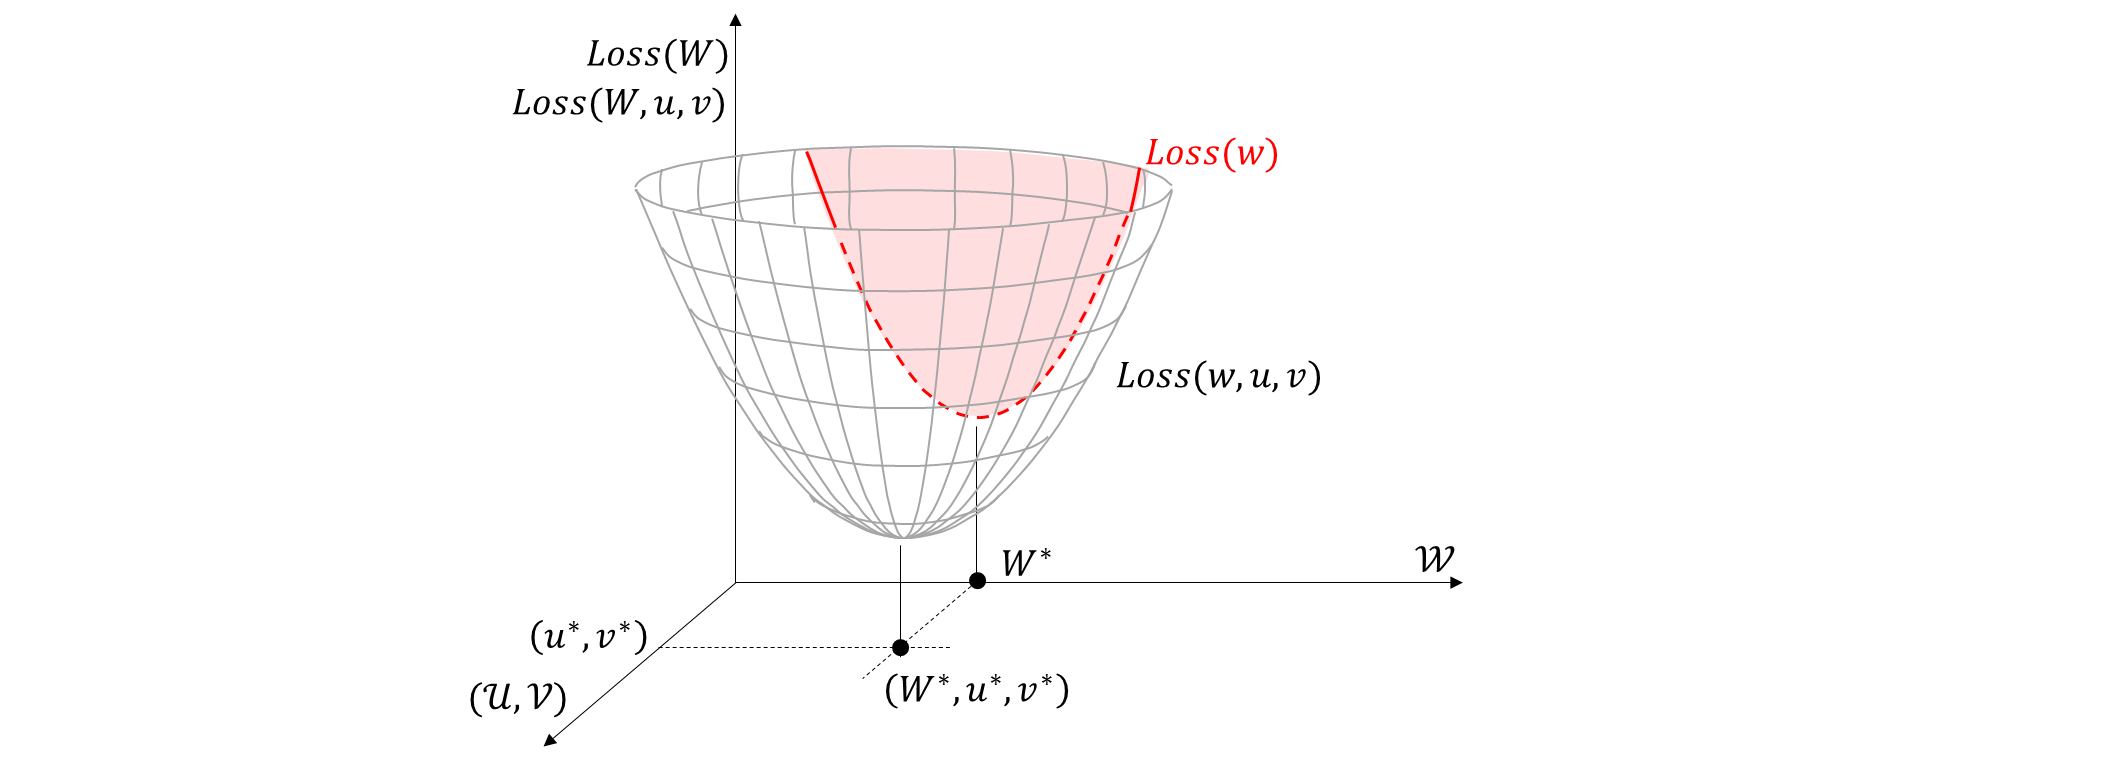

$ \ \ $ $\checkmark \ $ Feasible solution set을  $\mathcal{W}$라고 할 때,  feasible solution $W$에 대해 다음과 같은 부등식이 성립

$$
Loss(W, u, v) = Loss(W) + \sum_{i=1}^{m} u_{i} g_{i}(W) + \sum_{j=1}^{k} v_{j} h_{j}(W) \le Loss(W) , \ \ \forall \ W \in \mathcal W
$$

$ \ \ $ $\checkmark \ $  Primal Problem의 Optimal value를 $Loss^* = Loss \left( W^* \right)$ 할 때<br><br>

<span style="color:red">
$$
Loss^* = \underset{W \in w}{min} \ \ Loss(W)
\ge
\underset{W \in \mathcal{W}}{min} \ \ Loss(W, u, v)
\ge 
\underset{W}{min} \ \ Loss(W, u, v):= k(u, v)
$$
</span>
<br><br>
$\bullet \ $ Lagrangian Dual Function $k(u, v)$

$$
k(u, v) = \underset{W}{min} \ \ Loss(W, u, v)
$$

$\qquad $ 여기서 $u_i \in R^m, v_j \in R^r, u_i > 0, \ v_j > 0 \ \ for \ \ all \ \ i, j$<br><br>

$\bullet \ $ Lagrangian Dual Function $k(u, v)$은 다음 부등식을 만족함<br>

$$
Loss^* \ge k(u, v), \ \forall  \ u_i, v_j \ 그리고 \  u_i >0, \ \  v_j >0,  \ \forall \ i, j 
$$<br>

$ \ \ $ $\checkmark \ $   다시 말해서, $k(u, v)$는 $Loss^*$에 대한 lower bound가 됨<br> 

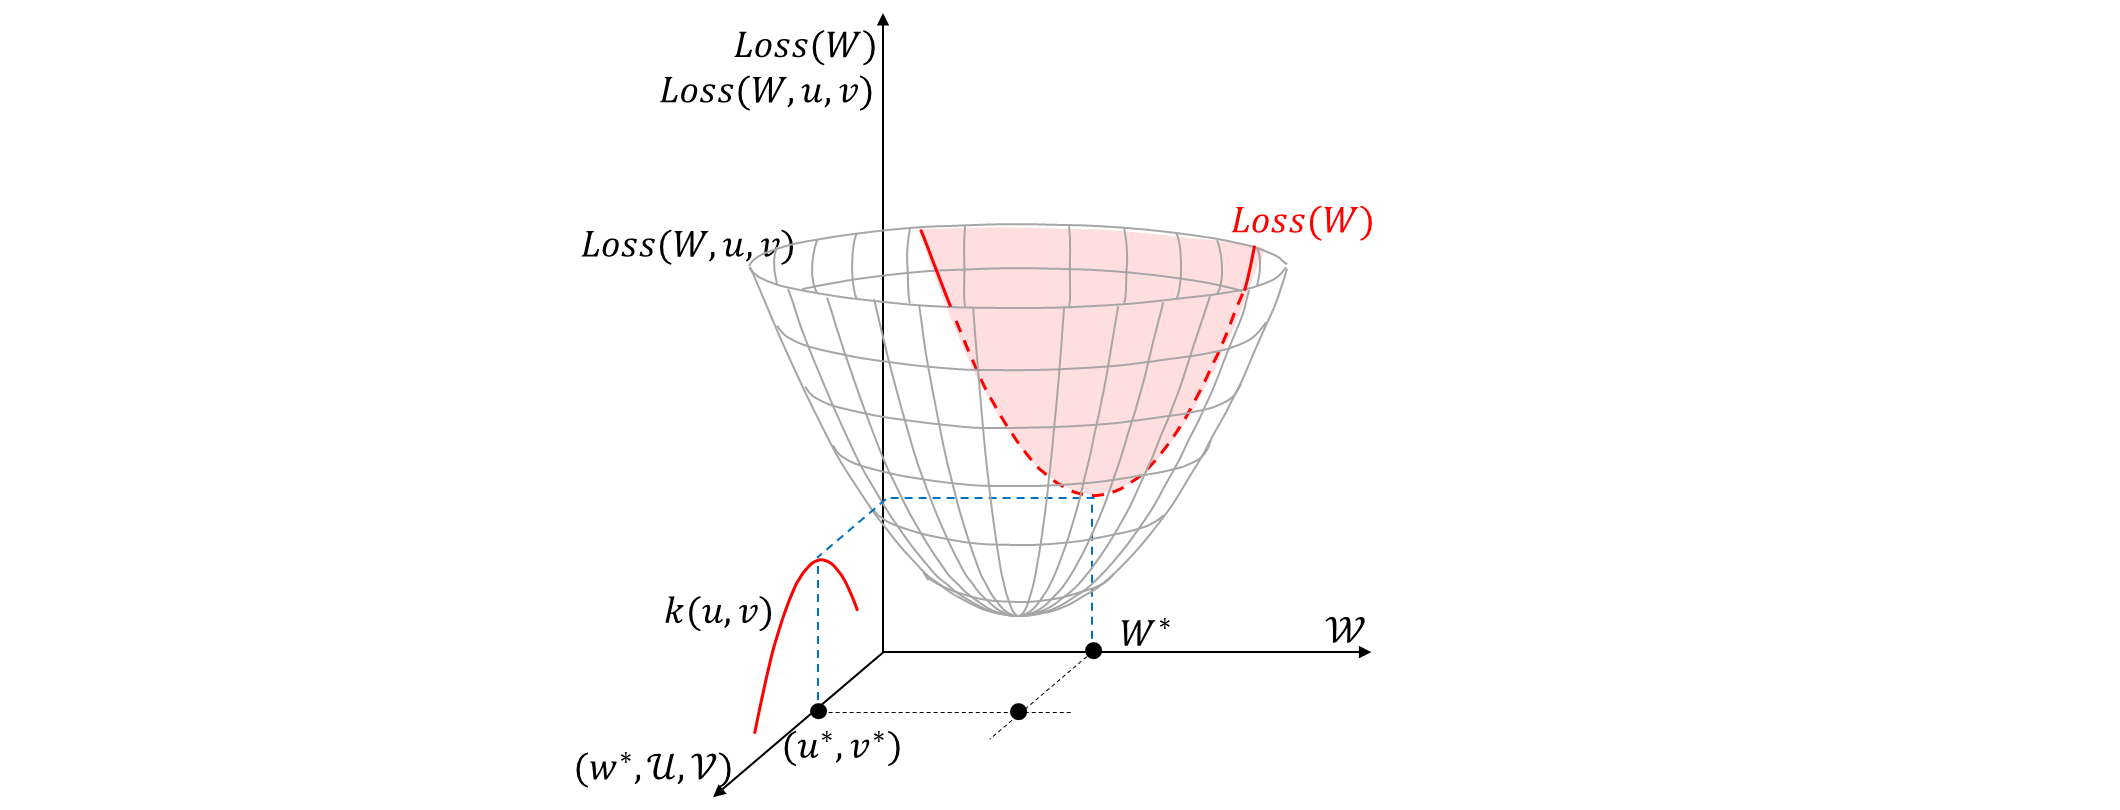

####  (3) Lagrangian Primal Problem

- 위의 제약식이 있는 Original Problem을 Lagrangian Multiplier를 이용하여 제약식이 없는 문제로 변환한 문제를 Lagrangian Primal Problem라고 함 <br><br>

<span style="color:red">
$\qquad$ [Lagrangian Primal Problem]
    
$$
\begin{align}
& Objective \ \ function: \ \  \underset{W}{minimize} \ \  Loss(W, u, v) = Loss(W) + \sum_{i=1}^{m} u_{i} g_{i}(W) + \sum_{j=1}^{k} v_{i} h_{j}(W) \\
& Constraints: \qquad \quad \  subject \ \ to \ \ \  u_i >0, \quad for \ \ all \ \ i  \\
& \qquad \qquad \qquad \qquad  \qquad \qquad \ \ \  v_i >0, \quad for \ \ all \ \ j 
\end{align}
$$
</span>

####  (4) Lagrangian Dual Problem


- Lagrangian Dual Problem은 Lagrangian Primal Problem에서 objective function에 대해 $\frac{\partial L(W, u, v) }{\partial W}=0$를 만족하는 $W^*$값를  Lagrangian Primal Problem에 대입한  maximize하는 문제를 말함<br>
$ \ \ $ $\checkmark \ $ $W^*$는 dual variable인 $u$와 $v$의 함수로 나타나게 됨 <br><br>

<span style="color:red">
$\qquad$ [Lagrangian Dual Problem]
    
$$
\begin{align}
& Objective \ \ function: \ \  \underset{u, v}{maximize} \ \  k(u, v) \\
& Constraints: \qquad \quad \  subject \ \ to \ \ \  u_i >0, \quad for \ \ all \ \ i  \\
& \qquad \qquad \qquad \qquad  \qquad \qquad \ \ \  v_i >0, \quad for \ \ all \ \ j 
\end{align}
$$
</span>
   

####  (5) Weak duality: Lagrangian Dual Function이 가지는 성질

- Weak duality<br>
$ \ \ $ $\checkmark \ $ Lagrange dual problem의 optimal value  $ k^* = \underset{u, v}{max} \ \  k(u, v)$에 대해 다음이 항상 성립함<br>

<span style="color:red">
$$
Loss^* = Loss \left( W^* \right) \ge k^* = k \left( u^*, v^*  \right)
$$
</span>
<br>

####  (6) Weak Duality의 의미

- 우리가 다루는 문제는 $Loss(W)$를 최소화하는 $W^*$를 찾는 Primal Problem임


- Primal Problem과 대응되는,  Lagrange dual problem은 $Loss(W)$를 최소화하는 문제를 푸는 대신, $Loss^* = Loss(W^*)$의 lower bound인 $k(u, v)$를 최대화하는 $u^*, v^*$를 구함으로써 $L^*$를 찾는 방법을 채택하는 것임


- Weak Duality의 성질은 임의의 최적화 문제의 Dual Optimal Value $k^*$가 Primal Optimal Value $Loss^*$보다 작거나 같다는 보장일 뿐 실제로 $k^* = Loss^*$를 의미하지는 않음

####  (7) Strong Duality

- **Weak duality**<br>
$$
Loss^* = Loss \left( W^* \right) \ge k^* = k \left( u^*, v^*  \right)
$$
- **Strong Suality** <br>
$ \ \ $ $\checkmark \ $  Weak duality에서 **Slater’s condition**을 추가로 만족하면 다음 등식이 성립함<br><br>
$$
Loss^* = Loss \left( W^* \right) = k^* = k \left( u^*, v^*  \right)
$$
<br>
- **Slater’s condition**<br>
$ \ \ $ $\checkmark \ $  만약 Primal Problem이 convex optimization problem이고, 즉 다음과 같은 함수이면<br>
<br>
$$
\begin{align}
Loss(W):& \ \ Convex \ \ functions \\
g_{i}:& \ \ Affine \ \ functions, i=1,..., m  \\
h_{j}:& \ \ Affine \ \ functions, j=1,...,k 
\end{align}
$$ <br>
$\qquad$ $\Longrightarrow$ Strong Duality를 만족함<br>

####  (8) Regression과 Strong Duality

- Regression의 Parameter 추정 문제는 Slater’s condition을 만족하므로 $w^* = \left( Z'Z  \right)^{-1}Z'y$는 Strong Duality를 만족하는 Solution임<br><br>

$\qquad$ (i) Objective function $\rightarrow$ Slater’s condition 만족<br>

$$
Loss(w) = \sum_{i=1}^{n} \left( y_i - \hat y_i   \right)^2
$$

$\qquad$ (ii) Constraints $\rightarrow$ Slater’s condition 만족<br>

$$
y_i = w_0 + w_1 z_1 + \cdots + w_{p-1} z_{p-1} + \varepsilon_{i}, \quad i=1,...,n
$$

#### (9)  Deep Neural Network과 Strong Duality

- Deep Neural Network의 Parameter 추정 문제는 Slater’s condition을 만족하는지 알 수 없음<br>
$ \ \ $ $\checkmark \ $ Objective function $\rightarrow$ Slater’s condition 만족<br>

$$
Loss(W) = \sum_{i=1}^{n} \left( y_i - \hat y_i   \right)^2
$$

$ \qquad $ $\checkmark \ $ Constraints $\rightarrow$ Slater’s condition을 만족하는지 알 수 없음<br>
$ \qquad $ $\checkmark \ $ 각 hidden layer에 적용한 Activation function인 $\sigma^{(l)}$에 따라 다름<br>

$$
\hat y = z^{(L+1)} = \sigma^{(L)} \hat W^{(L)} \cdots \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right) , i=1,...,n
$$

#### (10)  Karush-Kuhn-Tucker Conditions

#####  Primal problem
$$
\begin{align}
Objective \ \ function: \ \  \underset{w}{minimize} \ \ & Loss(W) \\
Constraints: \ \  subject \ \ to \ \ \        &g_i(W) \le 0, i=1,..., m              \\
                             &h_j(W)=0,     j=1,..., k  
\end{align}
$$
<br>
<br>
#####  Dual problem
$$
\begin{align}
Objective \ \ function: \ \  \underset{u, v}{maximize} \ \ & k(u, v) \\
Constraints: \ \  subject \ \ to \ \ \        &u_i \ge 0, i=1,..., m   \\
                                              &v_i \ge 0, i=1,..., k 
\end{align}
$$
<br>
$\qquad$ 단 $k(u, v)=\underset{W}{minimize} \ \ Loss(W, u, v)$이고 $ Loss(W, u, v)$는 다음과 같이 정의된 함수임
$$
\begin{align}
Loss(W, u, v) = Loss(W) + \sum_{i=1}^{m} u_{i} g_{i}(W) + \sum_{j=1}^{k} v_{i} h_{j}(W)
\end{align}
$$
$\qquad$ 여기서 $u \in R^m, v \in R^k, u_i >0, v_j >0 \ \ for \ \ all \ \ i, for \ \ all \ \ j$ 
<br>
<br>

#####  Karush-Kuhn-Tucker Conditions(이하 KKT conditions)

- 등식과 부등식을 제약조건으로 가지는 최적화 문제에서 Optimal Sulution $W^*$는 다음 4가지 조건을 만족시킴
- 또한 다음 4가지 조건을 만족하면 Optimal Solution임

 Condition 명 | $\qquad \quad $ 수식 | 의미
 :----| :----| :----
 <br>stationarity | <br>$$\begin{align} & \frac{\partial Loss(W, u, v)}{\partial W} = 0 \\  &  즉, \ \frac{\partial Loss(W)}{\partial W}
+ \sum_{i=1}^{m} u_i \frac{\partial g_i(W)}{\partial W} 
+ \sum_{i=1}^{k} v_i \frac{\partial h_i(W)}{\partial W}
= 0
\end{align}$$ | $\bullet \ $ Optimal Solution은 <br> $ \ \ $ Critical Point 여야함
 <br>Primal Feasibility | <br>$$\begin{align} g_{i}(W) &\le 0 \ \ \ for \ \  all \ \  i \\  h_{j}(W) &= 0 \ \ \ for \ \  all \ \   j  \end{align}$$ | $\bullet \ $ Primal Problem의 <br> $ \ \ $ Constraints를 만족해야함
 <br>Dual Feasibility | <br>$$\begin{align} u_{i} \ge& 0   \ \ \ for \ \  all \ \  i \\ v_{j} \ge& 0   \ \ \ for \ \  all \ \  j  \end{align}$$ | $\bullet \ $ Dual Problem의 <br> $ \ \ $Constraints를 만족해야함
 <br>Complementary Slackness | <br>$$ u_{i} \dot g_{i}(W) = 0 \ \ \ for \ \  all \ \  i  $$ | $\bullet \ $ 만약 Optimal Solution $W^*$가   <br> $ \ \ $ $g_i$ $\left( W^* \right)$ $<0$의 영역의 solution아라면   <br> $ \ \ $ 이때의 부등식 제약조건은 Slack <br> $ \ \ $ Constraint라고 부름 <br> $ \ \ $ $\checkmark \ $ 이 경우 Slack Constraint에 대한  <br> $\quad \ \ $ Dual Variable 값은 $u_i = 0$을 만족해야함<br> $\bullet \ $ 만약 Optimal Solution $W^*$가 부등식의  <br> $ \ \ $ 제약조건의 경계인 $g_i$ $\left( W^* \right)$ $=0$의 영역에   <br> $ \ \ $ 있다면 이 때의 제약을 Bounding Constraint <br> $ \ \ $라고  부르고 이 경우는 등식  제약조건과  <br> $ \ \ $  같게 됨 <br> $\bullet \ $ 위의 2 경우를 합치면Somplement Slackness  <br> $ \ \ $ 조건이 성립하게 됨

##### KKT Condition의 의미해석


-  $(Case \ 1)$  먼저 등식 Constraint가 1개 있는 좀 더 간단한 다음과 같은 문제를 생각해 보자

$$
\begin{align}
& min \ \ Loss(W) \   \\
& s.t. \ \ h(W) \ = \ 0
\\\\ &\Longrightarrow \\
& min \ \ Loss(W, v) \ = \ Loss(W) \ + \ v h (W)  \\
& s.t. \ \ v \ \ge \ 0
\end{align}
$$<br>

$\qquad$ $\checkmark \ $ Critical point는 다음식을 만족하는 점임
$$
\begin{align}
\frac{\partial Loss(W, v)}{\partial W} =& \frac{\partial Loss(W)}{\partial W} + v \frac{\partial h(W)}{\partial W} = 0  \\
\frac{\partial Loss(W)}{\partial W} =& - v \frac{\partial h(W)}{\partial W}
\end{align}
$$

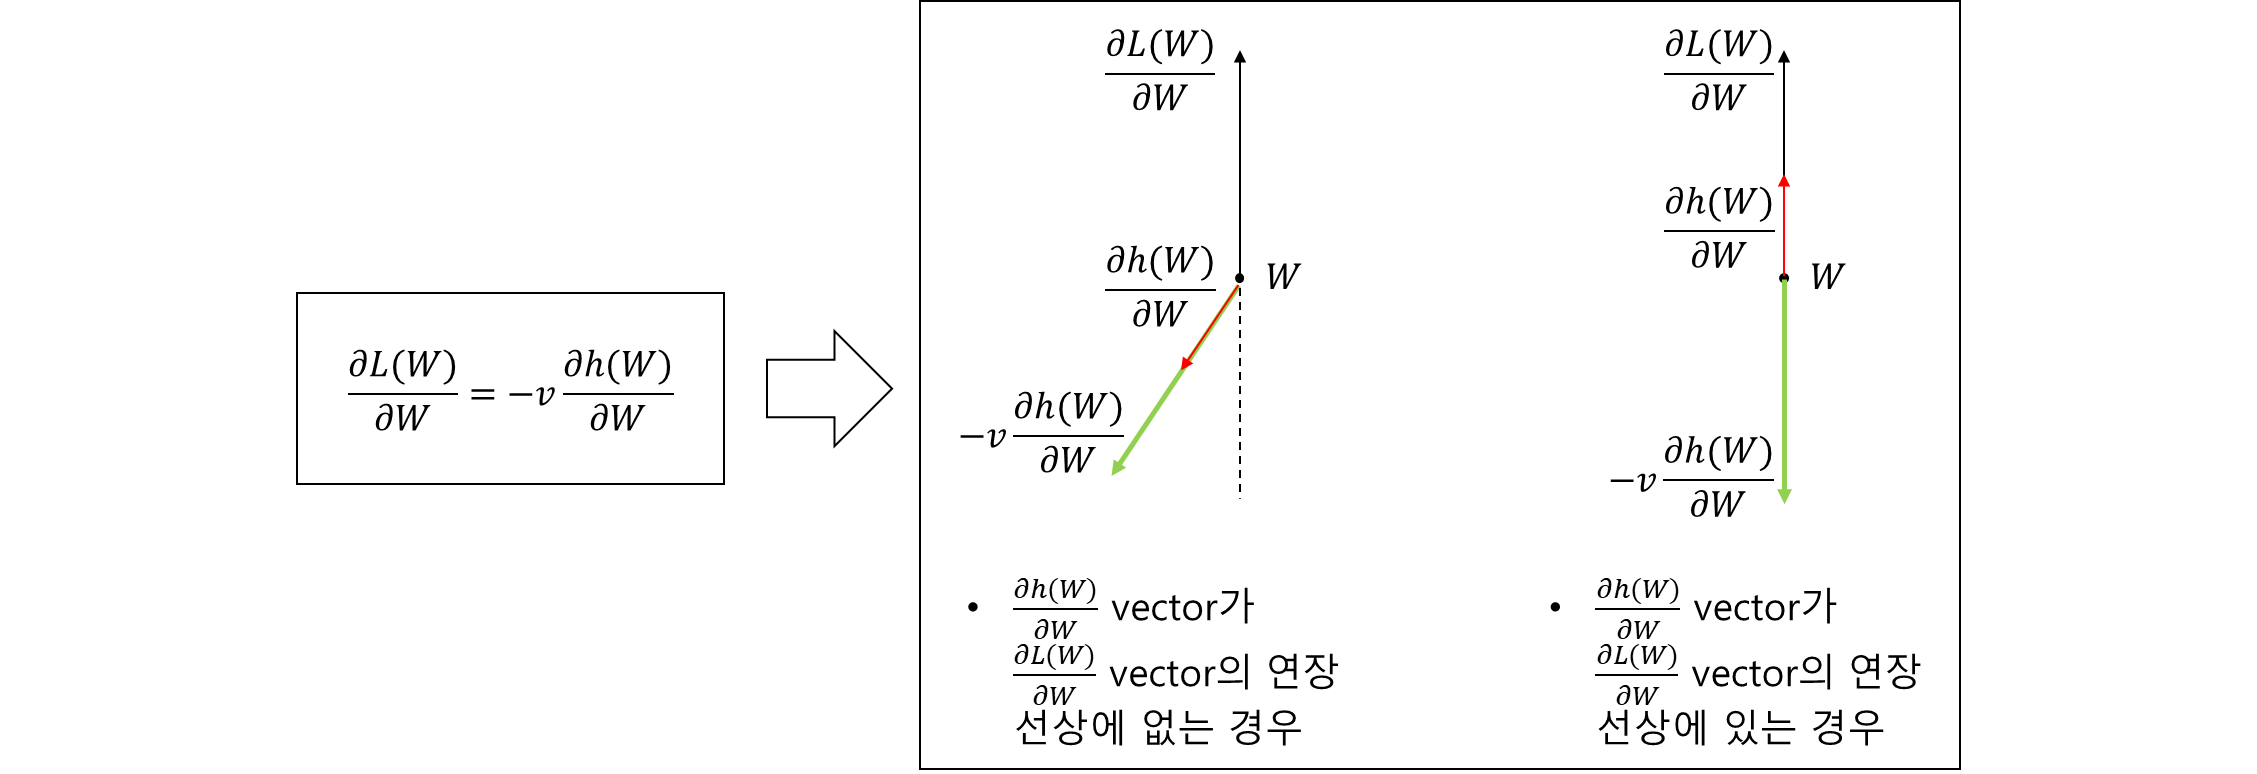

-  $(Case \ 2)$  $Case \ 1$을 확장하여 등식 Constraint가 $m$개 있는 문제를 생각해 보자

$$
\begin{align}
& min \ \ Loss(W) \   \\
& s.t. \ \ h_j(W) \ = \ 0, \ j=1, ..., m
\\\\ &\Longrightarrow \\
& min \ \ Loss(W, v) \ = \ Loss(W) \ + \ \sum_{j=1}^{m}v_j h_j (W)  \\
& s.t. \ \ v_j \ \ge \ 0,  \ j=1, ..., m
\end{align}
$$<br>

$\qquad$ $\checkmark \ $ Critical point는 다음식을 만족하는 점임
$$
\begin{align}
\frac{\partial Loss(W, v)}{\partial W} =& \frac{\partial Loss(W)}{\partial W} + \ \sum_{j=1}^{m}v_j \frac{\partial h_j(W)}{\partial W} = 0  \\
\frac{\partial Loss(W)}{\partial W} =& - \sum_{j=1}^{m}v_j \frac{\partial h_j(W)}{\partial W}
\end{align}
$$

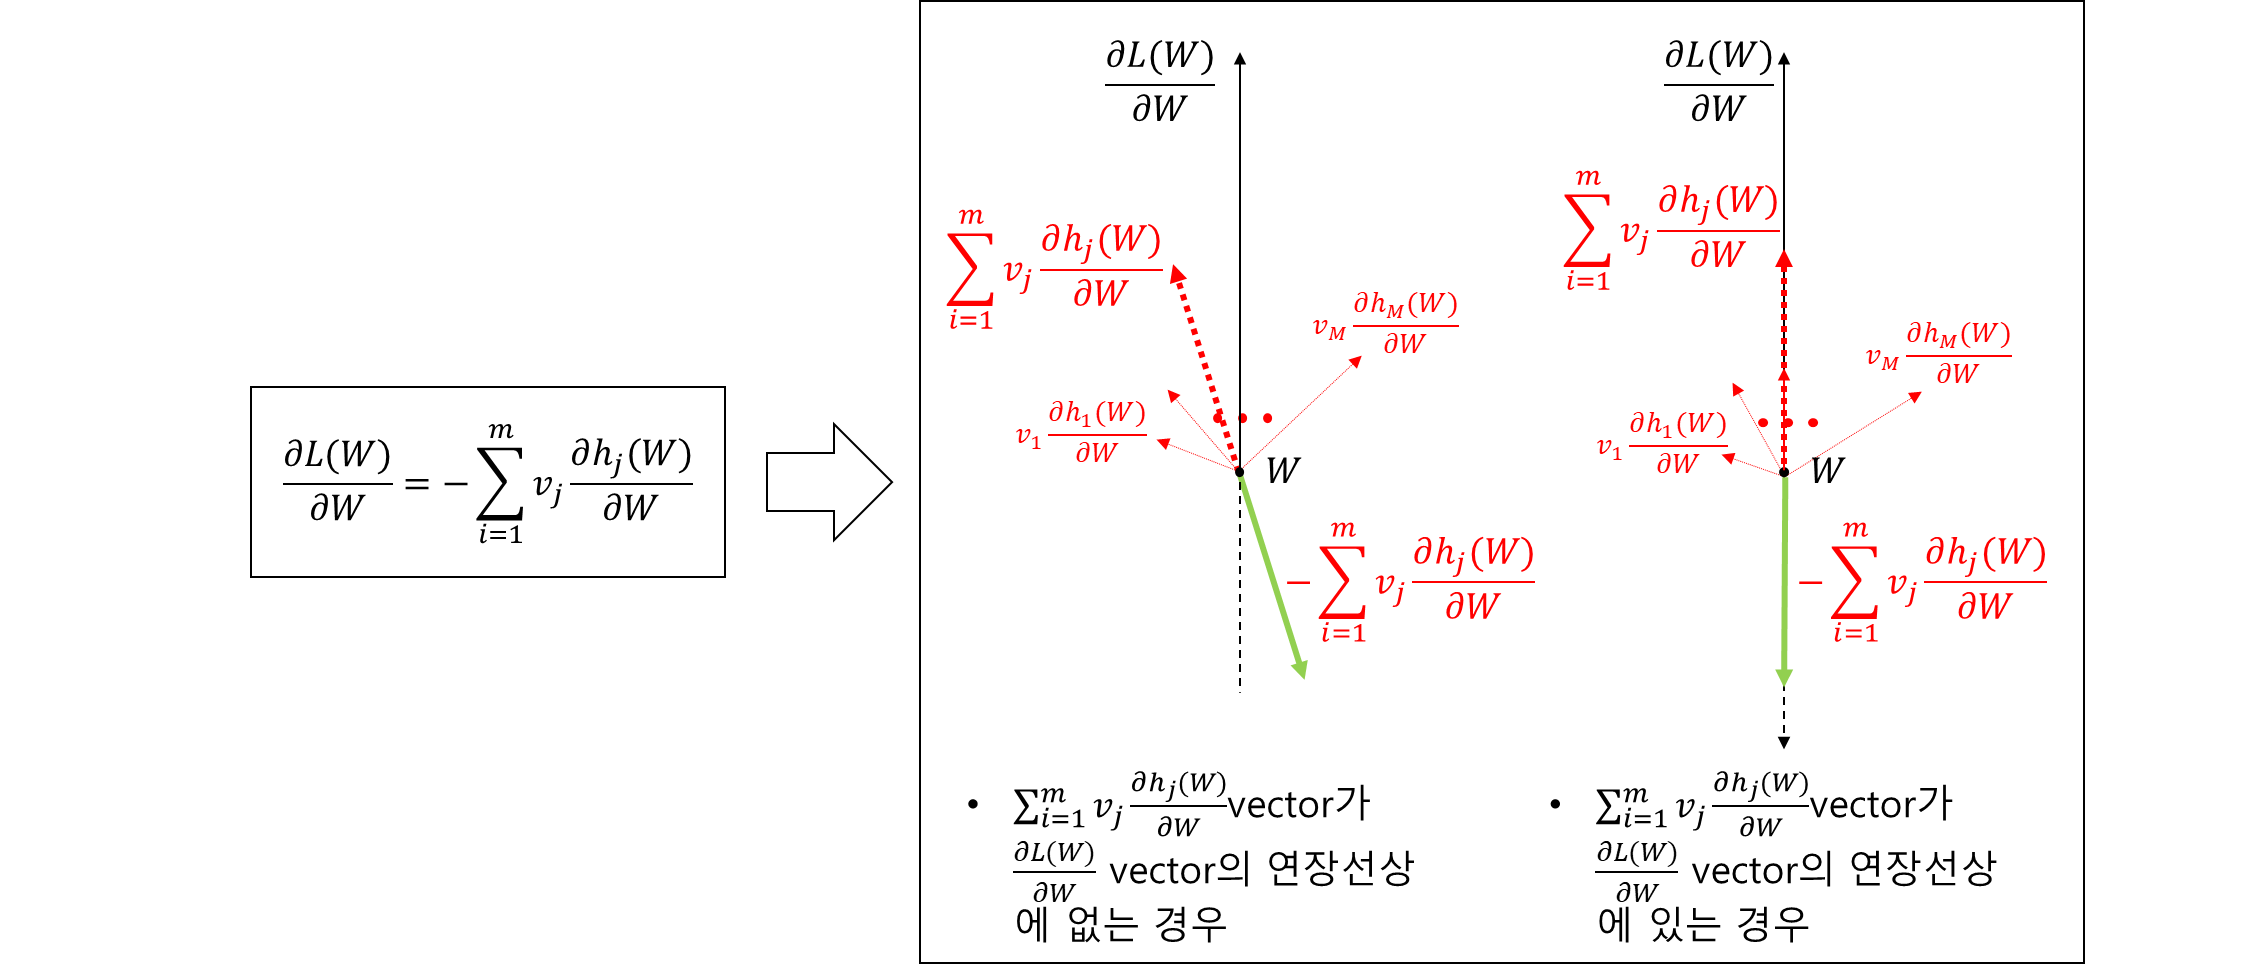

- Complementary Slackness 보조그림

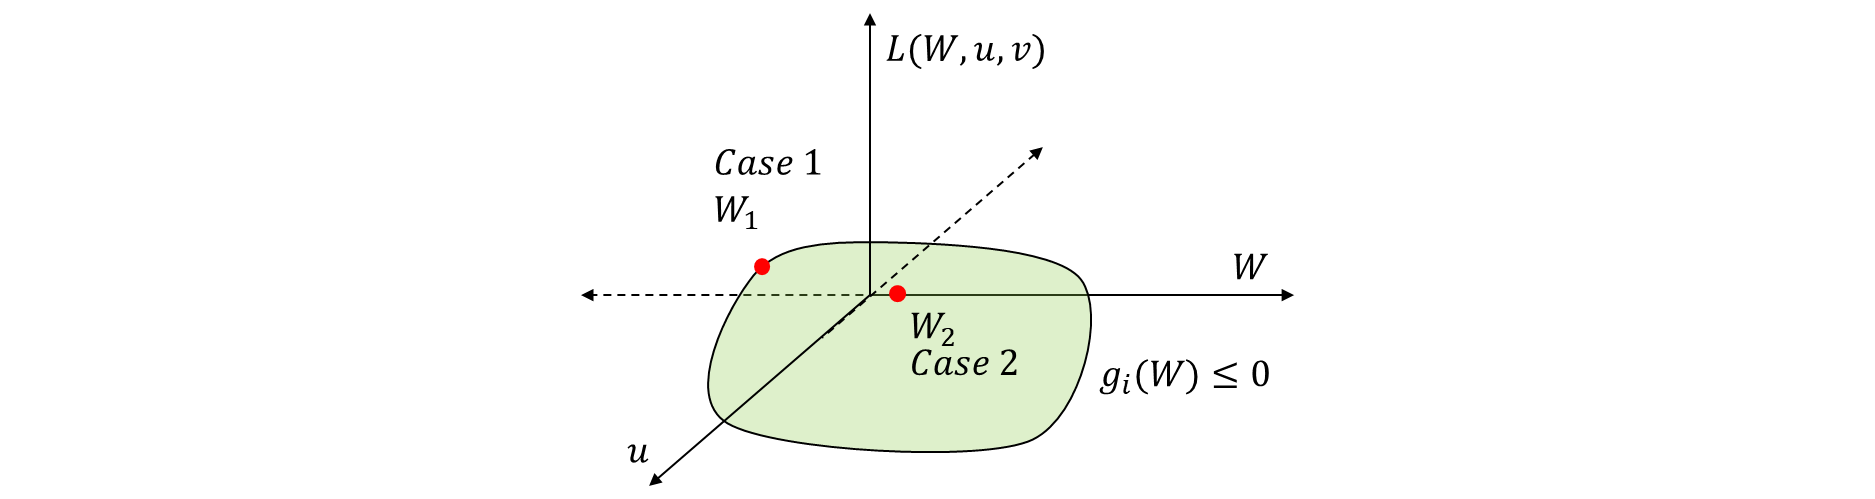

#####  Strong Duality가 성립하는 Optimization문제의 Optimal Solution은  KKT conditions을 만족함
$$ 
\begin{align}
W^*: &Primal \ \ Optimal \ \ Solutions   \\
u^*, v^*: &Dual \ \ Optimal \ \ Solutions  \\
\iff&  \\
W^*, u^*, v^*& 는 \ \ KKT \ \ Conditions을 \ \ 만족
\end{align}
$$

#### [생각해 보기 6 ]

- Primal Problem과 Dual Problem의 관계를 설명해 볼 수 있는가?


- Complementary Slackness의 의미를 설명해 볼 수 있는가?<br>


